<a href="https://colab.research.google.com/github/lidia-notebook/JCDS/blob/master/TransJakarta_Analysis_Lidia_Priskila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BACKGROUND**

A city-owned bus rapid transit (BRT), wants to improve their service to customers and optimizing the revenue. That's why they hire a data scientist to give them insights about their customer that is backed by data.

**the goal** is transform messy transit data into insights that save costs, improve services, and increase revenue.

In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

In [2]:
!pip -q install gdown
import gdown
import pandas as pd

In [3]:
file_id = "1JxRpYmKYsxLitlFAlHdXlLu76DOF8VqR"
out_path = "data.csv"
gdown.download(id=file_id, output=out_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JxRpYmKYsxLitlFAlHdXlLu76DOF8VqR
To: /content/data.csv
100%|██████████| 8.98M/8.98M [00:00<00:00, 42.7MB/s]


'data.csv'

In [4]:
df = pd.read_csv(out_path)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# **DATA CLEANSING & HANDLING**

##**1. Handling the duplicate**

In [5]:
df[df.duplicated(keep=False)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


The data above shows that there are no duplicate. but we want to make sure again.

In [6]:
df.duplicated().sum()

np.int64(0)

Still, there's no duplicate in the data so we don't need to drop it.

In [7]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

Note:

After seeing the columns given, we want to drop the every Lat and Lon columns

In [8]:
df = df.drop(columns=['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon'])

And we make sure if the dropping is succeed or not.

In [9]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'stopStartSeq', 'tapInTime',
       'tapOutStops', 'tapOutStopsName', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

## **2. Handling the missing values**

Now, ,after handling the duplicates we want to see the missing values.

In [10]:
df.isnull().any().any()

np.True_

From the result above, it shows, there are missing values in the dataframe. That's why we want to check how many missing values exist and sort it from the column that has biggest to lowest missing values

In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
tapOutStops,2289
corridorName,1930
tapOutStopsName,1344
stopEndSeq,1344
tapOutTime,1344
corridorID,1257
tapInStops,1213
payAmount,1007
payCardID,0
transID,0


The table above shows, the missing values are spreaded in some coloumns such as in tapOutStops(2289), corridorName (1930), tapOutStopsName, stopEndSeq, tapOutTime that all of them are having 1334 missing values, corridorID (1257), tapInStops (1213), and payAmount (1007)


then we want to check the **percentage** of missing value

In [12]:
print("Percentage of missing values on Dataset:")
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]
missing_percent.round(2)


Percentage of missing values on Dataset:


,0
tapOutStops,6.04
corridorName,5.09
tapOutStopsName,3.55
stopEndSeq,3.55
tapOutTime,3.55
corridorID,3.32
tapInStops,3.20
payAmount,2.66


After we know the percentage of missing values, make a visualization to check the outlier

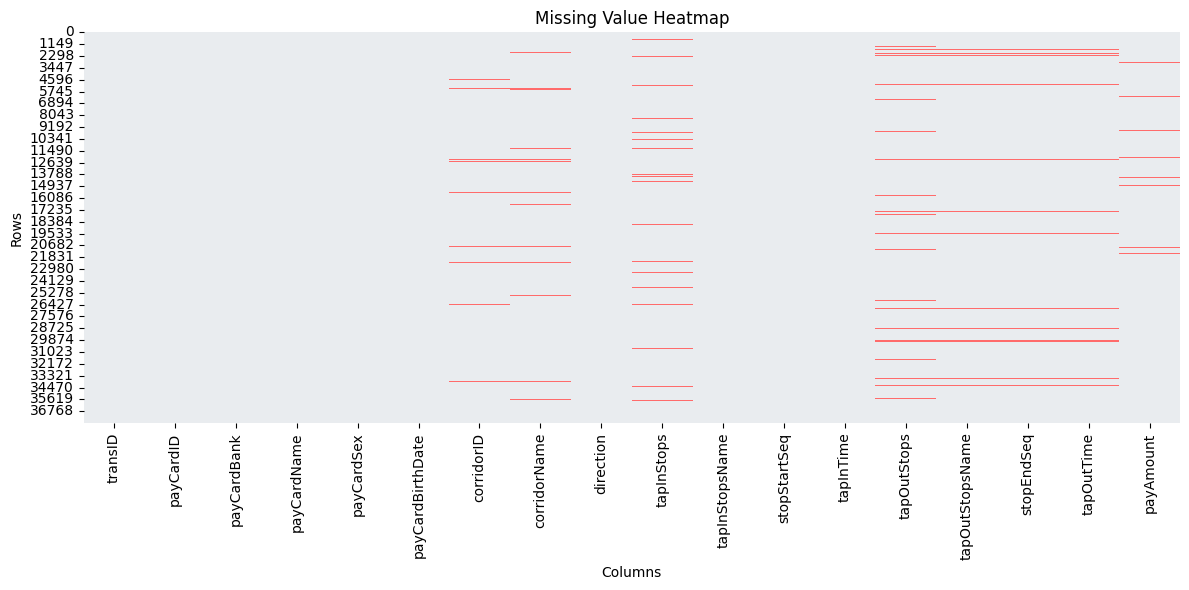

In [13]:
import seaborn as sns
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#e9ecef', '#ff6b6b'])

plt.figure(figsize=(12, 6))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap=cmap,
    vmin=0, vmax=1
)
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

From the heatmap above we can see;
1. Only some columns contain missing values (red line), which only appears in;
 a. corridorID

 b. corridorName

 c. tapInStops

 d. tapOutStopsName

 e. stopEndSeq

 f. tapOutTime

 g. payAmount

 h. tapOutStops

2. There are some multiple columns can be missing in the same row, in example both corridorName and tapOutTime is missing in the same transaction.

**a. Handle the TapInStops**

We start handling the TapInStops because the user journey is IN -> OUT

In [14]:
common_tapin_per_tapout = (
    df[['tapInStops', 'tapOutStops']]
    .dropna()
    .groupby('tapOutStops')['tapInStops']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)


And we show the most common tapIn based on the tapOut

In [15]:
for k, v in list(common_tapin_per_tapout.items())[:5]:
    print(f"Most common tapIn for tapOut {k} is {v}")

Most common tapIn for tapOut B00002P is B05815P
Most common tapIn for tapOut B00003P is B05403P
Most common tapIn for tapOut B00004P is B00251P
Most common tapIn for tapOut B00005P is B00420P
Most common tapIn for tapOut B00013P is B06533P


now, we want to define the imputation function.

so,
* leave the value as-is if tapInStops is already filled
* if its missing, we see the tapOutStops.
  - if tapOutStops filled, we fill with the most common tapInStops
  - if no, we fill with 'Unknown'

In [16]:
def fill_tapInStops(row):
    if pd.isna(row['tapInStops']):
        if pd.notna(row['tapOutStops']):
            return common_tapin_per_tapout.get(row['tapOutStops'], 'Unknown')
        else:
            return 'Unknown'
    return row['tapInStops']


In [17]:
df['tapInStops_filled'] = df.apply(fill_tapInStops, axis=1)
df.head(25)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,stopEndSeq,tapOutTime,payAmount,tapInStops_filled
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,7,2023-04-03 05:21:44,P00253,Tegalan,12.0,2023-04-03 06:00:53,3500.0,P00142
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,21.0,2023-04-03 06:40:01,3500.0,B01963P
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,39.0,2023-04-03 06:50:55,3500.0,B00499P
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,29.0,2023-04-03 06:28:16,3500.0,B05587P
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,15.0,2023-04-03 06:57:03,3500.0,P00239
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,3,2023-04-03 05:08:01,B00694P,Grand Sahid,6.0,2023-04-03 05:52:25,20000.0,B00127P
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,0.0,B00243P
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,2,2023-04-03 06:44:24,B00899P,Jln. Baros,12.0,2023-04-03 07:11:43,0.0,B03416P
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,16.0,2023-04-03 06:51:12,20000.0,B00795P
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,TPU Bungur,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,24.0,2023-04-03 06:51:12,3500.0,B05781P


In [18]:
filled_count = df['tapInStops_filled'].isna().sum()
filled_count

np.int64(0)

Validation check

In [19]:
original_missing = df['tapInStops'].isna().sum()
original_missing

np.int64(1213)

In [20]:
new_missing = df['tapInStops_filled'].isna().sum()
new_missing

np.int64(0)

Now, we want to check the outliers.


Rare cutoff: count < 38  |  Rare stops: 2308


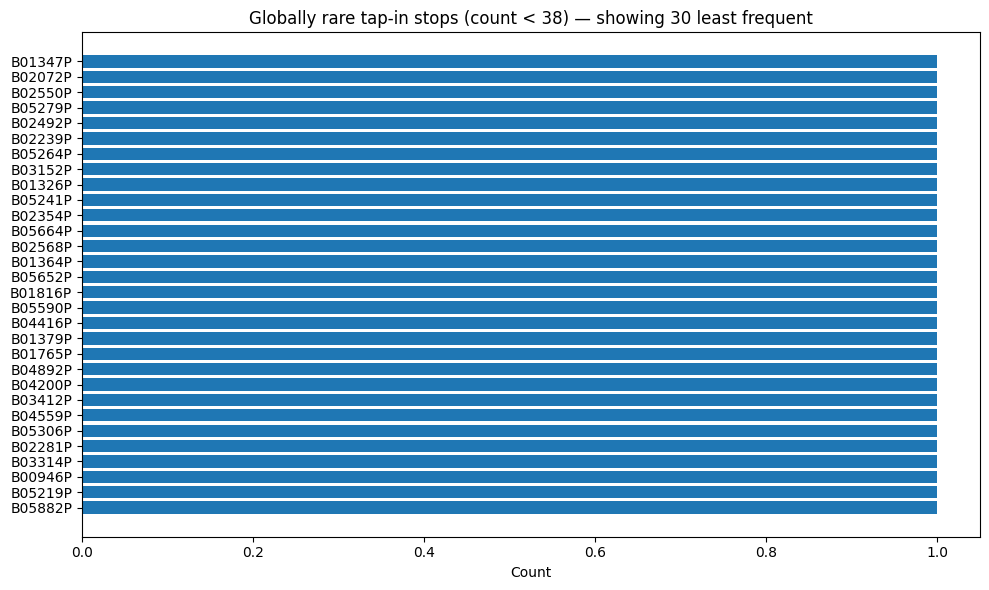

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

work_col = 'tapInStops_filled' if 'tapInStops_filled' in df.columns else 'tapInStops'


counts = df[work_col].astype(str).str.strip().value_counts()
total  = counts.sum()
RARE_MIN_COUNT = 5
RARE_MIN_SHARE = 0.001
cutoff = max(RARE_MIN_COUNT, int(np.ceil(RARE_MIN_SHARE * total)))

rare = counts[counts < cutoff].sort_values()
print(f"Rare cutoff: count < {cutoff}  |  Rare stops: {len(rare)}")

N = 30
to_show = rare.head(N)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(to_show.index.astype(str), to_show.values)
ax.set_title(f'Globally rare tap-in stops (count < {cutoff}) — showing {min(N,len(rare))} least frequent')
ax.set_xlabel('Count')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


In [22]:
work_col = 'tapInStops_filled' if 'tapInStops_filled' in df.columns else 'tapInStops'
assert work_col in df.columns, f"{work_col} not found"

if 'trip_min' not in df.columns:
    for c in ('tapInTime','tapOutTime'):
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors='coerce')
    df['trip_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds()/60


Then pick Top 5 Stops based on Frequency

In [23]:
top5 = df[work_col].value_counts().head(5).index.tolist()
print("Top-5 tap-in stops:", top5)

sub = df[df[work_col].isin(top5)].copy()

Top-5 tap-in stops: ['P00170', 'P00064', 'P00016', 'P00297', 'P00164']


Calculate per-stop IQR outliers

In [24]:
grp = sub.groupby(work_col)['trip_min']
q1  = grp.transform(lambda s: s.quantile(0.25))
q3  = grp.transform(lambda s: s.quantile(0.75))
iqr = q3 - q1
sub['out_iqr_stop'] = (sub['trip_min'] < (q1 - 1.5*iqr)) | (sub['trip_min'] > (q3 + 1.5*iqr))

To make it more clear, we calculate the distance (in meter) & fare outliers within each stop.

In [25]:
if 'distance_m' in sub.columns:
    with np.errstate(divide='ignore', invalid='ignore'):
        sub['speed_kmh'] = (sub['distance_m']/1000) / (sub['trip_min']/60)
    sub.loc[~np.isfinite(sub['speed_kmh']), 'speed_kmh'] = np.nan
    sub['out_speed_stop'] = (sub['speed_kmh'] < 3) | (sub['speed_kmh'] > 100)   # tune if needed
else:
    sub['out_speed_stop'] = False

if 'fare' in sub.columns:
    lo = sub.groupby(work_col)['fare'].transform(lambda s: s.quantile(0.01))
    hi = sub.groupby(work_col)['fare'].transform(lambda s: s.quantile(0.99))
    sub['out_fare_stop'] = (sub['fare'] < lo) | (sub['fare'] > hi)
else:
    sub['out_fare_stop'] = False

Lastly, we print the summary on what we have done above.

In [26]:
summary = (sub.groupby(work_col)
           .apply(lambda g: pd.Series({
               'n': len(g),
               'trip_med_min': g['trip_min'].median(),
               'trip_q1': g['trip_min'].quantile(0.25),
               'trip_q3': g['trip_min'].quantile(0.75),
               'outliers_iqr_cnt': g['out_iqr_stop'].sum(),
               'outliers_iqr_share_%': 100*g['out_iqr_stop'].mean(),
               'speed_out_cnt': g['out_speed_stop'].sum(),
               'fare_out_cnt': g['out_fare_stop'].sum(),
           }))).sort_values('n', ascending=False)

print("\nTop-5 stops — outlier summary")
print(summary.round(3))


Top-5 stops — outlier summary
                       n  trip_med_min  trip_q1  trip_q3  outliers_iqr_cnt  \
tapInStops_filled                                                            
P00170             245.0        72.817   54.933   92.083               0.0   
P00064             213.0        65.842   48.371   88.171               0.0   
P00016             173.0        74.717   53.729   93.250               0.0   
P00297             157.0        63.333   44.583   90.238               0.0   
P00164             147.0        72.667   53.383   99.517               0.0   

                   outliers_iqr_share_%  speed_out_cnt  fare_out_cnt  
tapInStops_filled                                                     
P00170                              0.0            0.0           0.0  
P00064                              0.0            0.0           0.0  
P00016                              0.0            0.0           0.0  
P00297                              0.0            0.0           0.

/tmp/ipython-input-3528241151.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


After seeing the table, we convert it to boxplot to make it more easier to spot the outliers.

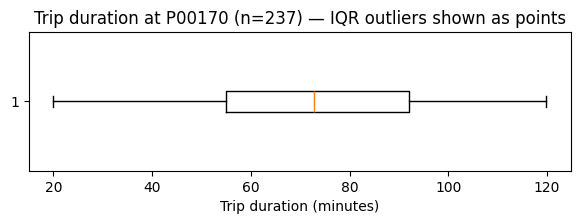

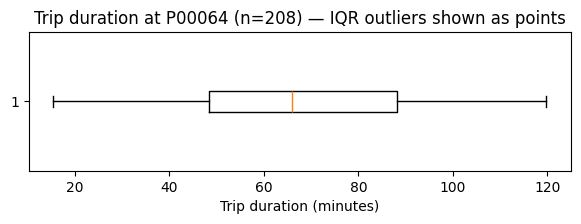

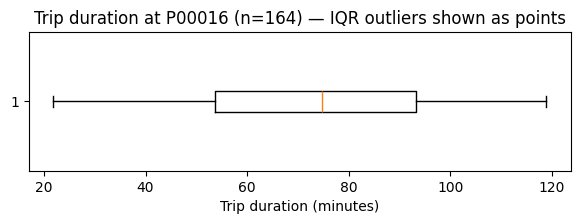

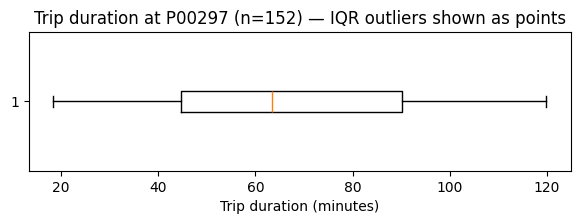

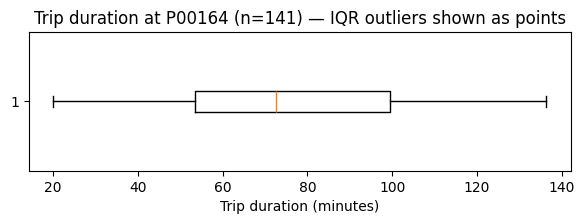

In [27]:
for stop in top5:
    s = sub.loc[sub[work_col]==stop, 'trip_min'].dropna()
    if s.empty:
        continue
    fig, ax = plt.subplots(figsize=(7, 1.8))
    ax.boxplot(s, vert=False, showfliers=True)
    ax.set_title(f"Trip duration at {stop} (n={len(s)}) — IQR outliers shown as points")
    ax.set_xlabel("Trip duration (minutes)")
    plt.show()

From the summary above, we can see that the Top 5 stops have 0% IQR outliers. As well as from the boxplot, it looks has no outliers.

**b. Handling the TapOutStops**

Step 1: Fill the missing TapOutStops based on the common where TapInStops comes from

In [28]:
common_tapout_per_tapin = (
    df[['tapInStops_filled', 'tapOutStops']]
    .dropna()
    .groupby('tapInStops_filled')['tapOutStops']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

In [29]:
for tapin, tapout in list(common_tapout_per_tapin.items())[:5]:
    print(f"Most common tapOutStops for {tapin} is {tapout}")

Most common tapOutStops for B00001P is B00536P
Most common tapOutStops for B00004P is B05612P
Most common tapOutStops for B00005P is B05703P
Most common tapOutStops for B00008P is B05760P
Most common tapOutStops for B00017P is B05584P


Step 2: define a function called fill tapOutStops that will:
- Keep the value in tapOutStops if its already present
- If its missing, we used filled tapInStops to dinf the most common tapOutStops.
- Of both are missing, or not in the mapping --> "Unknown"


In [30]:
def fill_tapOutStops(row):
    if pd.isna(row['tapOutStops']):
        if pd.notna(row['tapInStops_filled']):
            return common_tapout_per_tapin.get(row['tapInStops_filled'], 'Unknown')
        else:
            return 'Unknown'
    return row['tapOutStops']

After that, now we are about to apply the function to the missing values in TapOutStops

In [31]:
df['tapOutStops_filled'] = df.apply(fill_tapOutStops, axis=1)

In [32]:
df.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,stopEndSeq,tapOutTime,payAmount,tapInStops_filled,trip_min,tapOutStops_filled
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,12.0,2023-04-03 06:00:53,3500.0,P00142,39.150000,P00253
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,21.0,2023-04-03 06:40:01,3500.0,B01963P,57.283333,B03307P
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,39.0,2023-04-03 06:50:55,3500.0,B00499P,51.816667,B04962P
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,29.0,2023-04-03 06:28:16,3500.0,B05587P,43.416667,B03090P
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,15.0,2023-04-03 06:57:03,3500.0,P00239,39.466667,P00098
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,3,2023-04-03 05:08:01,B00694P,Grand Sahid,6.0,2023-04-03 05:52:25,20000.0,B00127P,44.400000,B00694P
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaT,0.0,B00243P,NaN,B04016P
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,2,2023-04-03 06:44:24,B00899P,Jln. Baros,12.0,2023-04-03 07:11:43,0.0,B03416P,27.316667,B00899P
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,16.0,2023-04-03 06:51:12,20000.0,B00795P,49.466667,B01853P
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,...,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,24.0,2023-04-03 06:51:12,3500.0,B05781P,53.416667,B06578P


After that, now we are going to compare distributions (before vs after) handling the values. Bsed on top 10

In [33]:
print("Original tapOutStops (non-null only):")
print(df['tapOutStops'].value_counts().head(10))

print("\n Imputed tapOutStops_filled (after cleaning):")
print(df['tapOutStops_filled'].value_counts().head(10))


Original tapOutStops (non-null only):
tapOutStops
P00016     306
P00170     255
B05725P    189
P00137     161
B05708P    158
P00112     158
P00199     146
P00179     140
B03396P    131
B01745P    127
Name: count, dtype: int64

 Imputed tapOutStops_filled (after cleaning):
tapOutStops_filled
P00016     338
P00170     269
B05725P    204
P00137     168
B05708P    165
P00112     159
P00199     156
B00248P    142
P00179     140
B03396P    139
Name: count, dtype: int64


We want to know how many "Unknown" values were assigned, that's why we calculate it

In [34]:
unknown_count = (df['tapOutStops_filled'] == 'Unknown').sum()
total_rows = len(df)

print(f"\n 'Unknown' values in tapOutStops_filled: {unknown_count} ({(unknown_count/total_rows)*100:.2f}%)")



 'Unknown' values in tapOutStops_filled: 63 (0.17%)


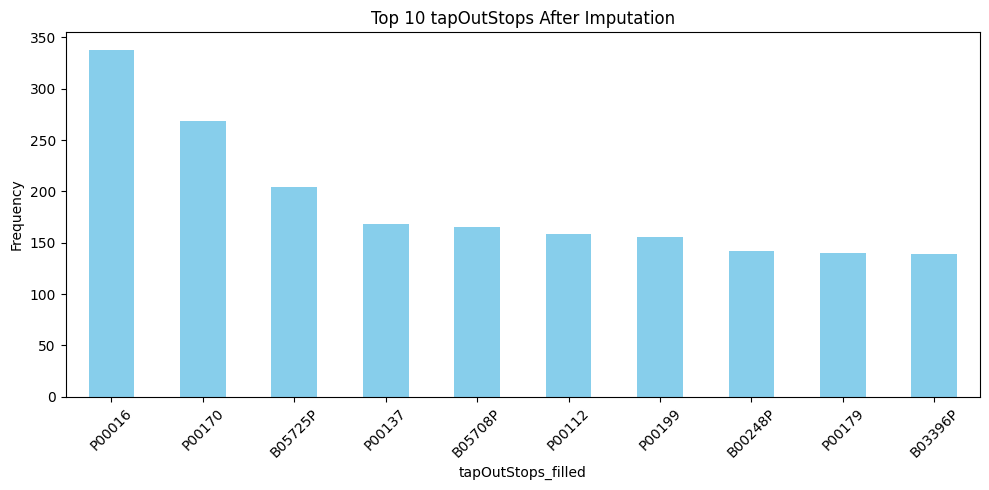

In [35]:
import matplotlib.pyplot as plt
df['tapOutStops_filled'].value_counts().head(10).plot(
    kind='bar',
    title='Top 10 tapOutStops After Imputation',
    figsize=(10, 5),
    color='skyblue'
)
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After the imputations, we can see the top 10 frequent tapOutStops are P00016, P00170, B05725P, B05708P, P00112, P00199, and B00248P

Before moving on, we want to check if there's outlier in tapOutStops after imputation. We want to check the outliers based on top 5 most frequent tapOutStops and to 5 rarest.

Top-5 tapOUT stops: ['P00016', 'P00170', 'B05725P', 'P00137', 'B05708P']
Rarest-5 tapOUT stops: ['B01241P', 'B04614P', 'B04003P', 'B01854P', 'P00156']


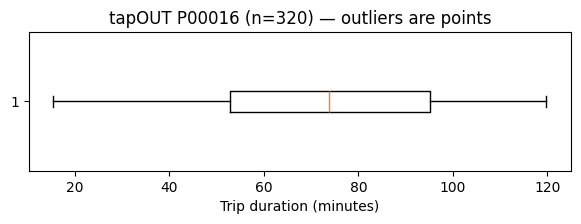

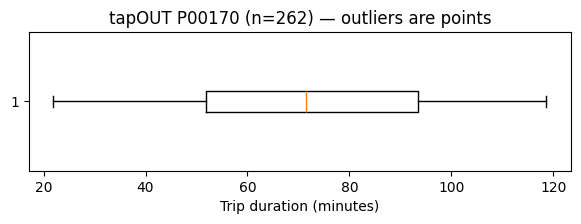

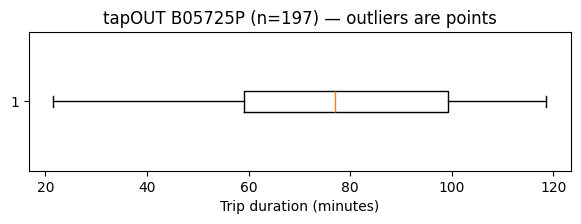

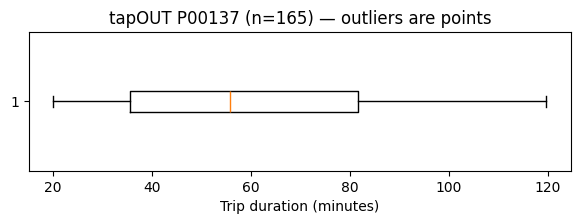

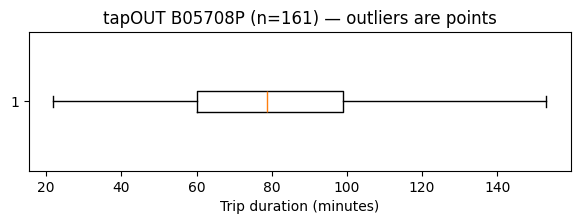

Skipping B01241P (n=1); too few rows for a boxplot.
Skipping B04614P (n=1); too few rows for a boxplot.
Skipping B04003P (n=1); too few rows for a boxplot.
Skipping B01854P (n=1); too few rows for a boxplot.
Skipping P00156 (n=1); too few rows for a boxplot.


In [36]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

work_col = 'tapOutStops_filled' if 'tapOutStops_filled' in df.columns else 'tapOutStops'
assert work_col in df.columns, f"{work_col} not found"

if 'trip_min' not in df.columns:
    for c in ('tapInTime','tapOutTime'):
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors='coerce')
    df['trip_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds()/60

s = df[work_col].astype('string').str.strip()

counts = s.dropna().value_counts()
top5  = counts.head(5).index.tolist()
rare5 = counts.sort_values(ascending=True).head(5).index.tolist()

print("Top-5 tapOUT stops:", top5)
print("Rarest-5 tapOUT stops:", rare5)

def boxplot_stops(stop_list, title_prefix):
    for stop in stop_list:
        vals = df.loc[s == stop, 'trip_min'].dropna()
        if len(vals) < 5:
            print(f"Skipping {stop} (n={len(vals)}); too few rows for a boxplot.")
            continue
        fig, ax = plt.subplots(figsize=(7, 1.8))
        ax.boxplot(vals, vert=False, showfliers=True)
        ax.set_title(f"{title_prefix} {stop} (n={len(vals)}) — outliers are points")
        ax.set_xlabel("Trip duration (minutes)")
        plt.show()

boxplot_stops(top5,  "tapOUT")
boxplot_stops(rare5, "tapOUT (rare)")


From the given data and boxplots, we can conclude that;
* The tap-out data looks healthy and useable
* The top 5 busiest tap-out stops, the trip cluster around 7- to 80 minutes, which most rides roughly around 55 to 100 minutes. Yey, in B05708P have longer rides up to 150mins, but nothing looks unusual.
* As for the rarest tap-out stops. They are most likely appears only once, so the patterns are not shown enough with a boxplot. Rarity doesn't mean wrong.

**c. Handling the corridorID**

Step 1: Build Mapping Table

The goal is to know the user behaviour, from the TapInStops and TapOutStops, which corridor they usually use

Framework: (tapInStops_filled, tapOutStops_filled) → most common corridorID

In [37]:
common_corridor_per_pair = (
    df[['tapInStops_filled', 'tapOutStops_filled', 'corridorID']]
    .dropna()
    .groupby(['tapInStops_filled', 'tapOutStops_filled'])['corridorID']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

In [38]:
for k, v in list(common_corridor_per_pair.items())[:5]:
    print(f"{k} → {v}")

('B00001P', 'B00536P') → JAK.46
('B00004P', 'B05612P') → D21
('B00005P', 'B05703P') → D11
('B00008P', 'B05760P') → JAK.32
('B00017P', 'B04791P') → JAK.31


Step 2: Defining the function
- if corridorID exists, keep the original
- if corridorID missing + known stop pair, use mapping table
- if corridorID missing + stop pair not in mapping, fill with "Unknown"

In [39]:
def fill_corridorID(row):
    if pd.isna(row['corridorID']):
        key = (row['tapInStops_filled'], row['tapOutStops_filled'])
        return common_corridor_per_pair.get(key, 'Unknown')
    return row['corridorID']

apply the imputation

In [40]:
df['corridorID_filled'] = df.apply(fill_corridorID, axis=1)

In [41]:
original_missing = df['corridorID'].isna().sum()
original_missing

np.int64(1257)

re-check how many missing values at the moment.

In [42]:
remaining_missing = df['corridorID_filled'].isna().sum()
remaining_missing

np.int64(0)

In [43]:
df.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,stopEndSeq,tapOutTime,payAmount,tapInStops_filled,trip_min,tapOutStops_filled,corridorID_filled
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,12.0,2023-04-03 06:00:53,3500.0,P00142,39.150000,P00253,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,21.0,2023-04-03 06:40:01,3500.0,B01963P,57.283333,B03307P,6C
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,39.0,2023-04-03 06:50:55,3500.0,B00499P,51.816667,B04962P,R1A
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,29.0,2023-04-03 06:28:16,3500.0,B05587P,43.416667,B03090P,11D
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,15.0,2023-04-03 06:57:03,3500.0,P00239,39.466667,P00098,12
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,2023-04-03 05:08:01,B00694P,Grand Sahid,6.0,2023-04-03 05:52:25,20000.0,B00127P,44.400000,B00694P,1T
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,2023-04-03 06:58:21,NaN,NaN,NaN,NaT,0.0,B00243P,NaN,B04016P,JAK.18
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,...,2023-04-03 06:44:24,B00899P,Jln. Baros,12.0,2023-04-03 07:11:43,0.0,B03416P,27.316667,B00899P,JAK.03
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,2023-04-03 06:01:44,B01853P,Kayuringin 2,16.0,2023-04-03 06:51:12,20000.0,B00795P,49.466667,B01853P,B14
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,...,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,24.0,2023-04-03 06:51:12,3500.0,B05781P,53.416667,B06578P,1Q


Then, we want to check the outliers on corridorID_filled

In [44]:
import numpy as np, pandas as pd

corr = 'corridorID_filled'
assert corr in df.columns, f"{corr} not found"
for c in ('tapInTime','tapOutTime'):
    if c in df.columns: df[c] = pd.to_datetime(df[c], errors='coerce')
if 'trip_min' not in df.columns:
    df['trip_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds()/60
df['hour'] = pd.to_datetime(df['tapInTime'], errors='coerce').dt.hour

df['ol_negative_or_null_time'] = df['trip_min'].isna() | (df['trip_min'] < 0)
df['ol_too_short'] = df['trip_min'] < 1
df['ol_too_long']  = df['trip_min'] > 180

min_n = 30

g_ch = df.groupby([corr,'hour'])['trip_min']
q1_ch = g_ch.transform(lambda s: s.quantile(0.25))
q3_ch = g_ch.transform(lambda s: s.quantile(0.75))
iqr_ch = q3_ch - q1_ch
n_ch = g_ch.transform('size')

g_c = df.groupby(corr)['trip_min']
q1_c = g_c.transform(lambda s: s.quantile(0.25))
q3_c = g_c.transform(lambda s: s.quantile(0.75))
iqr_c = q3_c - q1_c
n_c = g_c.transform('size')

q1_g = df['trip_min'].quantile(0.25)
q3_g = df['trip_min'].quantile(0.75)
iqr_g = q3_g - q1_g

use_ch = n_ch >= min_n
use_c  = (~use_ch) & (n_c >= min_n)

low = np.where(use_ch, q1_ch - 1.5*iqr_ch,
       np.where(use_c, q1_c - 1.5*iqr_c, q1_g - 1.5*iqr_g))
high = np.where(use_ch, q3_ch + 1.5*iqr_ch,
        np.where(use_c, q3_c + 1.5*iqr_c, q3_g + 1.5*iqr_g))

df['ol_iqr_corridor_hour'] = (df['trip_min'] < low) | (df['trip_min'] > high)

flag_cols = ['ol_negative_or_null_time','ol_too_short','ol_too_long','ol_iqr_corridor_hour']
df['is_outlier_any'] = df[flag_cols].any(axis=1)

overall_rate = df['is_outlier_any'].mean()*100
by_corridor  = (df.groupby(corr)['is_outlier_any'].mean()
                .mul(100).sort_values(ascending=False))

print(f"Overall outlier rate: {overall_rate:.2f}%")
print("\nCorridors with highest outlier share (top 10):")
print(by_corridor.head(10).round(2))



Overall outlier rate: 4.10%

Corridors with highest outlier share (top 10):
corridorID_filled
JAK.28    9.52
10B       8.39
JAK.12    8.33
JAK.44    8.03
10A       7.95
1N        7.94
8C        7.83
JAK.40    7.75
5M        7.65
9H        7.48
Name: is_outlier_any, dtype: float64


In [45]:
df.loc[df['is_outlier_any'], [corr,'hour','trip_min'] + flag_cols].head(20)

,corridorID_filled,hour,trip_min,ol_negative_or_null_time,ol_too_short,ol_too_long,ol_iqr_corridor_hour
6,JAK.18,6,NaN,True,False,False,False
30,JAK.46,6,NaN,True,False,False,False
70,1T,5,NaN,True,False,False,False
130,10D,5,NaN,True,False,False,False
192,3F,6,NaN,True,False,False,False
204,12B,5,NaN,True,False,False,False
206,JAK.110A,5,NaN,True,False,False,False
220,S11,5,NaN,True,False,False,False
246,B21,6,NaN,True,False,False,False
247,13,5,NaN,True,False,False,False


Result:
* overall outlier rate is around 4.1%, which means pretty healthy.
* Corridors with highest outlier share are JAk.28, 10B, and Jak.12

Why there are still outliers?
* --> We are still on early stage of data cleaning, so there are still missing/invalid trip one. In example, missing tap outs

**d. Handling CorridorName**

First thing first, we do mapping

In [46]:
corridor_name_lookup = (
    df[['corridorID', 'corridorName']]
    .dropna()
    .drop_duplicates()
    .set_index('corridorID')['corridorName']
    .to_dict()
)

Next, we define the imputation.
- if the corridorName exist, do nothing
- if corridorId available,  look for it and match making it
- if corridorId also missing, fill it with "unknown"

In [47]:
def fill_corridorName(row):
    if pd.isna(row['corridorName']):
        if pd.notna(row['corridorID_filled']):
            return corridor_name_lookup.get(row['corridorID_filled'], "Unknown")
        else:
            return "Unknown"
    return row['corridorName']

then, we do apply the function

In [48]:
df['corridorName_filled'] = df.apply(fill_corridorName, axis=1)

We want to see the before and after and preview the sample.

In [49]:
print("Before handling:", df['corridorName'].isna().sum())
print("After Filling:", df['corridorName_filled'].isna().sum())

df[df['corridorName'].isna()][['corridorID_filled', 'corridorName', 'corridorName_filled']].head(10)


Before handling: 1930
After Filling: 0


,corridorID_filled,corridorName,corridorName_filled
7,JAK.03,NaN,Lebak Bulus - Andara
38,5M,NaN,Kampung Melayu - Tanah Abang via Cikini
39,2,NaN,Pulo Gadung - Monas
60,T21,NaN,Palem Semi - Bundaran Senayan
61,12A,NaN,Pelabuhan Kaliadem - Kota
73,M3,NaN,Kalideres - Bundaran HI via Veteran
89,M11,NaN,Pulo Gebang - Pulo Gadung 2
112,JAK.13,NaN,Tanah Abang - Jembatan Lima
120,5C,NaN,PGC - Juanda
123,JAK.22,NaN,Dwikora - Penas Kalimalang


**e. Handling tapOutTime**

Step 1: Convert Time Columns to Date time

In [50]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')


Then, Step 2, do calculation trip duration for known rows.

In [51]:
df['trip_duration'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

avg_duration_lookup = (
    df.dropna(subset=['trip_duration'])
    .groupby(['tapInStops_filled', 'tapOutStops_filled'])['trip_duration']
    .mean()
    .to_dict()
)

global_avg_duration = df['trip_duration'].mean()


Next, we go to Step 3. Where we do define imputation function

In [52]:
from datetime import timedelta

def fill_tapOutTime(row):
    if pd.isna(row['tapOutTime']):
        key = (row['tapInStops_filled'], row['tapOutStops_filled'])
        avg_duration = avg_duration_lookup.get(key, global_avg_duration)
        if pd.notna(row['tapInTime']):
            return row['tapInTime'] + timedelta(minutes=avg_duration)
    return row['tapOutTime']


In [53]:
df['tapOutTime_filled'] = df.apply(fill_tapOutTime, axis=1)

In [54]:
print("Original:", df['tapOutTime'].isna().sum())
print("After Handling:", df['tapOutTime_filled'].isna().sum())

df[df['tapOutTime'].isna()][['tapInTime', 'tapOutTime', 'tapOutTime_filled']].head(10)


Original: 1344
After Handling: 0


,tapInTime,tapOutTime,tapOutTime_filled
6,2023-04-03 06:58:21,NaT,2023-04-03 08:15:38.850000
30,2023-04-03 06:14:02,NaT,2023-04-03 06:49:52.000000
70,2023-04-03 05:57:55,NaT,2023-04-03 06:35:12.550000
130,2023-04-03 05:40:04,NaT,2023-04-03 07:06:03.666667
192,2023-04-03 06:15:53,NaT,2023-04-03 07:37:06.731707
204,2023-04-03 05:37:24,NaT,2023-04-03 06:18:54.368421
206,2023-04-03 05:30:08,NaT,2023-04-03 06:54:43.250000
220,2023-04-03 05:40:05,NaT,2023-04-03 06:53:59.222222
246,2023-04-03 06:51:49,NaT,2023-04-03 07:30:46.941176
247,2023-04-03 05:32:02,NaT,2023-04-03 06:44:23.000000


Visualization

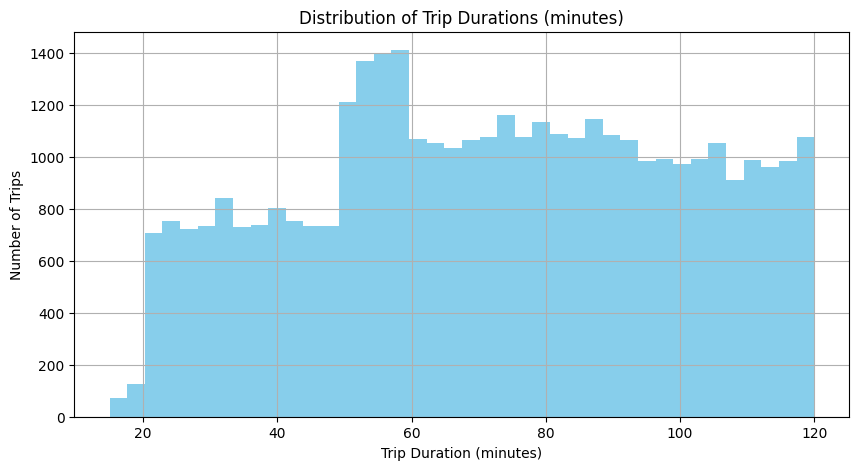

In [55]:
import matplotlib.pyplot as plt

df['filled_duration'] = (df['tapOutTime_filled'] - df['tapInTime']).dt.total_seconds() / 60

df['filled_duration'].dropna().clip(0, 120).plot.hist(
    bins=40,
    figsize=(10, 5),
    title="Distribution of Trip Durations (minutes)",
    color='skyblue'
)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()


From the Histogram above, we can see
 * Peak at -70 minutes, with the highest spike in volume (-1650 trips). It seems it scheduled or fixed-route pattern
 * short trip, <20 minutes is in the least portion. could indicate people doesnt really use Transjakarta if ita takes <20 minutes trip


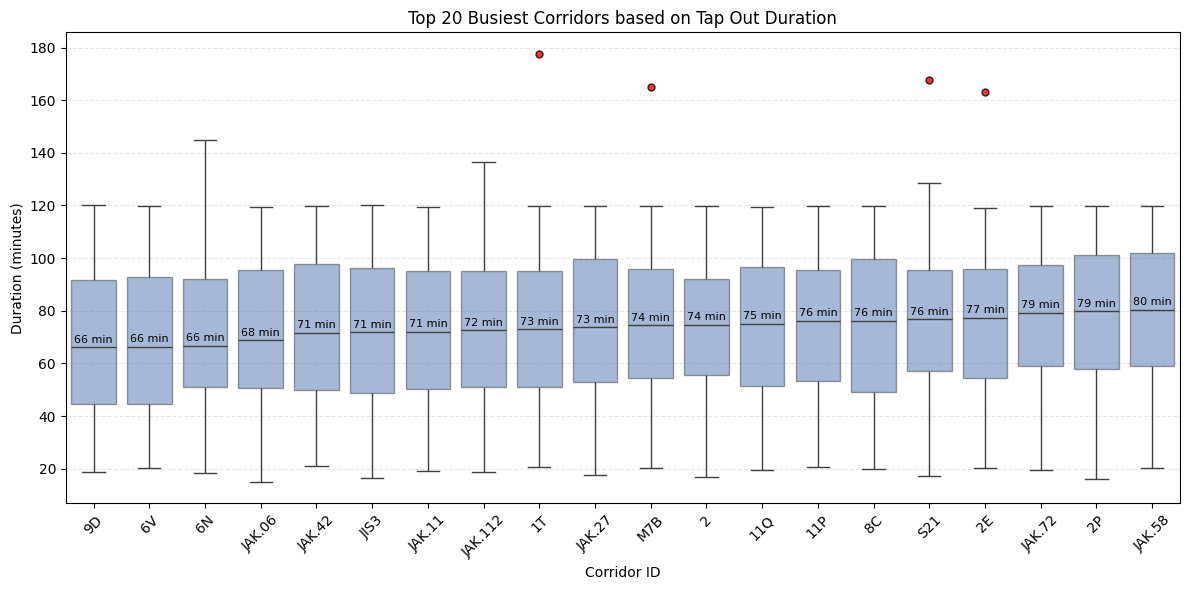

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

top_corridors = (
    df['corridorID'].value_counts()
      .nlargest(20)
      .index
)

df_top = df[df['corridorID'].isin(top_corridors)]

corridor_order = (
    df_top.groupby('corridorID')['filled_duration']
          .median()
          .sort_values()
          .index
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='corridorID',
    y='filled_duration',
    order=corridor_order,
    showfliers=True,
    linewidth=1,
    boxprops=dict(alpha=0.5, facecolor="#4C72B0"),  # Transparent blue boxes
    flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='black', alpha=0.8)  # Bold red outliers
)

plt.xticks(rotation=45)
plt.title("Top 20 Busiest Corridors based on Tap Out Duration")
plt.xlabel("Corridor ID")
plt.ylabel("Duration (minutes)")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

meds = df_top.groupby('corridorID')['filled_duration'].median()
for i, cid in enumerate(corridor_order):
    plt.text(i, meds[cid] + 1, f"{int(meds[cid])} min", ha='center', va='bottom', fontsize=8)

plt.show()

We can see the from the boxplot above that;
* typical trip time has median cluster around 66-80 min across the 20 busiest corridors.
* the lowest medians are at around 66 mins (corridor ID; 9D/6V)and the highest is up to 80 mins (Jak-58).
* IQR (spread), from the boxes spans shows corridor-level variability is moderate and similar across corridor.
* There are only few isolated outlers (appears near 165 - 180 mins). Which indicates there are rare long trips.

And we want to see the outliers based on CorridorName_filled x TapOutTime_filled

In [57]:
name_col = 'corridorName_filled'
tapin_col = 'tapInTime'
tapout_col = 'tapOutTime_filled' if 'tapOutTime_filled' in df.columns else 'tapOutTime'
min_n = 30
iqr_k = 1.5

assert name_col in df.columns, f"{name_col} not found"
assert tapin_col in df.columns and tapout_col in df.columns, "Need tapInTime and tapOutTime(_filled)."

df[tapin_col]  = pd.to_datetime(df[tapin_col],  errors='coerce')
df[tapout_col] = pd.to_datetime(df[tapout_col], errors='coerce')
df['trip_min_filled'] = (df[tapout_col] - df[tapin_col]).dt.total_seconds()/60
df['hour'] = df[tapin_col].dt.hour

g_ch  = df.groupby([name_col,'hour'])['trip_min_filled']
q1_ch = g_ch.transform(lambda s: s.quantile(0.25))
q3_ch = g_ch.transform(lambda s: s.quantile(0.75))
iqr_ch= q3_ch - q1_ch
n_ch  = g_ch.transform('size')

g_c   = df.groupby(name_col)['trip_min_filled']
q1_c  = g_c.transform(lambda s: s.quantile(0.25))
q3_c  = g_c.transform(lambda s: s.quantile(0.75))
iqr_c = q3_c - q1_c
n_c   = g_c.transform('size')

q1_g, q3_g = df['trip_min_filled'].quantile([0.25, 0.75])
iqr_g = q3_g - q1_g

use_ch = n_ch >= min_n
use_c  = (~use_ch) & (n_c >= min_n)

low  = np.where(use_ch, q1_ch - iqr_k*iqr_ch,
       np.where(use_c,  q1_c - iqr_k*iqr_c,  q1_g - iqr_k*iqr_g))
high = np.where(use_ch, q3_ch + iqr_k*iqr_ch,
        np.where(use_c,  q3_c + iqr_k*iqr_c,  q3_g + iqr_k*iqr_g))

df['ol_iqr_cname_hour'] = (df['trip_min_filled'] < low) | (df['trip_min_filled'] > high)

total_rows   = len(df)
outlier_cnt  = int(df['ol_iqr_cname_hour'].sum())
outlier_rate = 100 * df['ol_iqr_cname_hour'].mean()
print(f"TOTAL ROWS: {total_rows:,}")
print(f"IQR OUTLIERS using tapOutTime_filled: {outlier_cnt:,}  ({outlier_rate:.2f}%)\n")

by_name = (df.groupby(name_col)['ol_iqr_cname_hour']
             .agg(outlier_count='sum',
                  outlier_rate_pct=lambda s: 100*s.mean(),
                  n='size')
             .sort_values('outlier_count', ascending=False))

print("Top 15 corridor names by IQR outlier COUNT (with tapOutTime_filled):")
print(by_name.head(15).round({'outlier_rate_pct':2}))


TOTAL ROWS: 37,900
IQR OUTLIERS using tapOutTime_filled: 209  (0.55%)

Top 15 corridor names by IQR outlier COUNT (with tapOutTime_filled):
                                        outlier_count  outlier_rate_pct    n
corridorName_filled                                                         
Andara - Stasiun Universitas Pancasila             10              4.02  249
Pasar Minggu - Tanah Abang                          8              2.45  326
Lebak Bulus - Cipulir                               7              2.72  257
Pulo Gebang - Pulo Gadung 2 via PIK                 6              2.61  230
Blok M - Kota                                       5              1.61  311
Pondok Labu - Blok M                                5              3.38  148
Ragunan - Blok M via Kemang                         5              1.60  313
Lebak Bulus - Andara                                5              2.67  187
Rusun Cakung Barat - Pulo Gadung                    5              2.37  211
Kampung Rambu

From the table above we can see;
* Overall IQR outliers are in 209 rows or equal to 0.55% from total data.
* Top 3 corridors by outliers are Andara - St. Univ. Pancasila, and PS Minggu - Tn. Abang, Lb Bulus - Cipulir.
* From each corridors, all of the corridors are under 5%.

In [58]:
print(df.columns)


Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'stopStartSeq', 'tapInTime',
       'tapOutStops', 'tapOutStopsName', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInStops_filled', 'trip_min', 'tapOutStops_filled',
       'corridorID_filled', 'hour', 'ol_negative_or_null_time', 'ol_too_short',
       'ol_too_long', 'ol_iqr_corridor_hour', 'is_outlier_any',
       'corridorName_filled', 'trip_duration', 'tapOutTime_filled',
       'filled_duration', 'trip_min_filled', 'ol_iqr_cname_hour'],
      dtype='object')


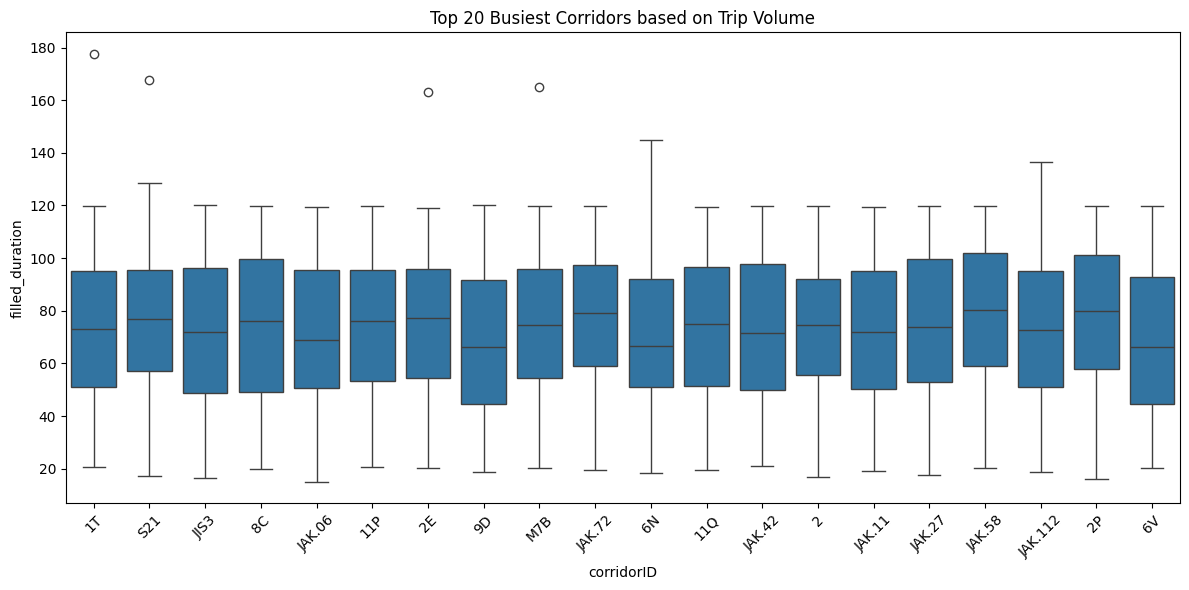

In [59]:
top_corridors = (
    df['corridorID'].value_counts()
    .nlargest(20)
    .index
)

df_top = df[df['corridorID'].isin(top_corridors)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top,
    x='corridorID',
    y='filled_duration',
    order=top_corridors
)
plt.title("Top 20 Busiest Corridors based on Trip Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



From the picture above we can see
* Typical trip time mostly around 70 to 80 minutes (based on the medians).
* Interquartile ranges are similar across corridors, which means corridor-to-corridor spread is fairly conssistent.
* There are few outliers, one above the 1T corridor, S21, 2E, and JAK.72.

After knowing the top 20 busiest corridor based on duration, we want to clasify the corridors based the trip duration. From shortest trip to longest trip

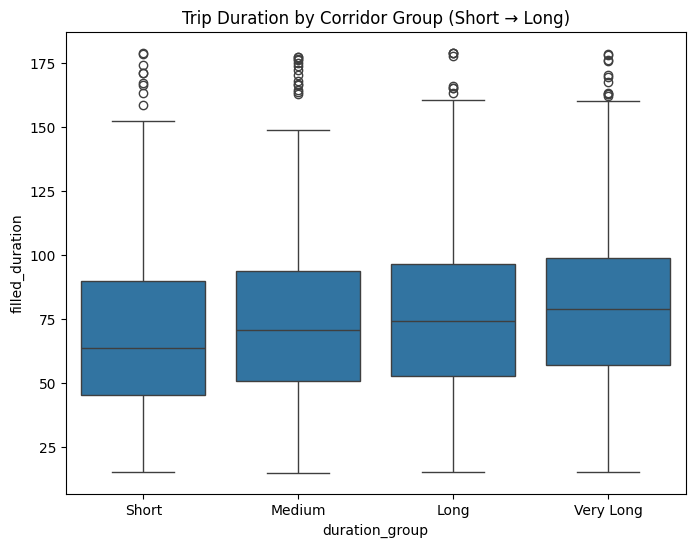

In [60]:
median_durations = df.groupby('corridorID')['filled_duration'].median()
duration_group = pd.qcut(median_durations, q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

df['duration_group'] = df['corridorID'].map(duration_group)


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='duration_group', y='filled_duration')
plt.title("Trip Duration by Corridor Group (Short → Long)")
plt.show()


* Medians rise steadily, which is normally since we short it out from short to very long.
* the IQR also rise gradually.
* There are outliers, in minutes 160 to 180

now, we are on the final data cleansing to "fill in" part, which is handling the PayAmounts.

**f. Handling payAmounts**

The way we handle the missing value is through;
* fill the missing values based on the data each customer journey has.
* If the tapIn and tapOut is filled, we do calculation on the fare


Step 1: Do Mode, Calculation based on common fare.
* We want to filters our rows where payAmount is missing.
* Do data grouping based on corridorID_filled
* For each corridor, we calculates the "mode" or known as most common fare value.
* Then, we saves it as a dictionary to make it easier

In [61]:
payamount_mode_per_corridor = (
    df.dropna(subset=['payAmount'])
    .groupby('corridorID_filled')['payAmount']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .to_dict()
)


Even though we already do the step 1, some corridors *might* have no payAmount data at all (both corridors missing).

That's why, we make a fallback or back-up solutions. Which it will be used when;
* the corridor doesn't exist in dictionary
* the dictionary value is None

In [62]:
global_payamount_mode = df['payAmount'].mode().iloc[0]


Then, we do the define imputation function like we did previously

In [63]:
def fill_payAmount(row):
    if pd.isna(row['payAmount']):
        if pd.notna(row['corridorID_filled']):
            return payamount_mode_per_corridor.get(row['corridorID_filled'], global_payamount_mode)
        else:
            return global_payamount_mode
    return row['payAmount']


In [64]:
df['payAmount_filled'] = df.apply(fill_payAmount, axis=1)

Next one, we do cross-check for the imputation results

In [65]:
print("Original missing:", df['payAmount'].isna().sum())
print("Missing values after the filling:", df['payAmount_filled'].isna().sum())

df[df['payAmount'].isna()][['corridorID_filled', 'payAmount', 'payAmount_filled']].head(10)


Original missing: 1007
Missing values after the filling: 0


,corridorID_filled,payAmount,payAmount_filled
11,M7B,NaN,3500.0
76,JAK.48B,NaN,3500.0
97,3H,NaN,3500.0
169,M7B,NaN,3500.0
198,JAK.48A,NaN,3500.0
219,JAK.48A,NaN,3500.0
227,M1H,NaN,3500.0
311,M7B,NaN,3500.0
376,JAK.48B,NaN,3500.0
397,3H,NaN,3500.0


checking whether the system uses flat fares helps us to decide whether to use a simple global mode or a more granular corridor-based imputation

First, we check unique fare values

In [66]:
print("Unique payAmount values:", df['payAmount'].nunique())
print(df['payAmount'].value_counts(dropna=False).sort_index())


Unique payAmount values: 3
payAmount
0.0        16648
3500.0     18503
20000.0     1742
NaN         1007
Name: count, dtype: int64


Then, step 2, we do analysis fare by corridor.

The purpose: it helps to decide how to impute missing payAmount values accurately and realistically

In [67]:
fare_per_corridor = df.groupby('corridorID_filled')['payAmount'].nunique().sort_values(ascending=False)
print(fare_per_corridor.head(10))


corridorID_filled
Unknown    3
11D        2
12         2
11P        2
1T         2
10K        2
2P         2
4B         2
M9         2
JAK.49     2
Name: payAmount, dtype: int64


From the analysis, we can conclude the structure is consistent and predictable. Since mostly corridors have only 2 unique fare values.

Next, we do visualization to check the outliers.

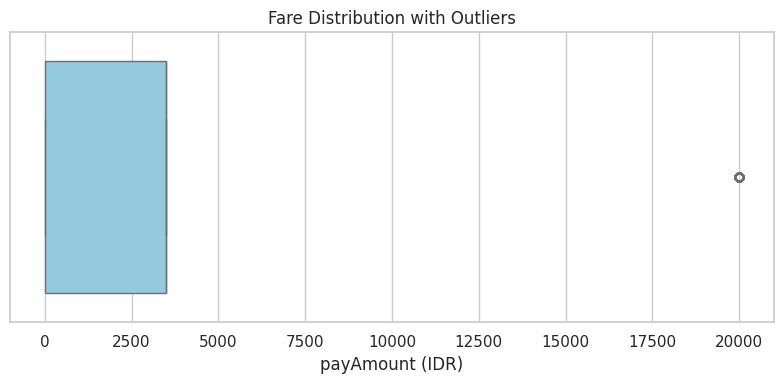

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['payAmount_filled'], color='skyblue')

plt.title('Fare Distribution with Outliers')
plt.xlabel('payAmount (IDR)')
plt.tight_layout()
plt.show()


Insights from the Fare Distribution Plot:
* Most values clusters are between Rp0 to 3,500, which is still normal range for TJ fares.
* There's an outlier in IDR 20,000

In [69]:
Q1 = df['payAmount'].quantile(0.25)
Q3 = df['payAmount'].quantile(0.75)
IQR = Q3 - Q1

min_val = df['payAmount'].min()
max_val = df['payAmount'].max()

print(f"Min payAmount: {min_val}")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Max payAmount: {max_val}")
print(f"IQR (Q3 - Q1): {IQR}")

Min payAmount: 0.0
Q1 (25th percentile): 0.0
Q3 (75th percentile): 3500.0
Max payAmount: 20000.0
IQR (Q3 - Q1): 3500.0


/tmp/ipython-input-1925299750.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payAmount_filled', data=df, palette='coolwarm')


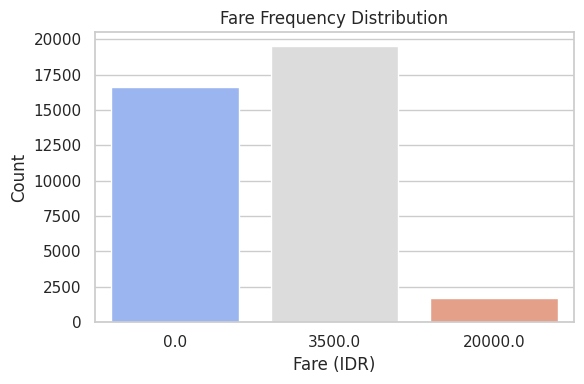

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='payAmount_filled', data=df, palette='coolwarm')
plt.title('Fare Frequency Distribution')
plt.xlabel('Fare (IDR)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The insights from above are;

* The data is right-skewed, due to the outliers (idr 20000)
* However, the data still dominating in fare at 3500 idr
* Zero fare may represents; free transfers, promotional things or even data fare count missing.


**g. Handling tapOutStopsName**

First of all, we re-make sure how many missing values is it

In [71]:
missing_count = df['tapOutStopsName'].isna().sum()

missing_pct = (missing_count / len(df)) * 100

print(f"Missing count in tapOutStopsName: {missing_count}")
print(f"Percentage of Missing Values in tapOutStopsName: {missing_pct:.2f}%")


Missing count in tapOutStopsName: 1344
Percentage of Missing Values in tapOutStopsName: 3.55%


In [72]:
stop_id_col = 'tapOutStops_filled' if 'tapOutStops_filled' in df.columns else 'tapOutStops'

missing_before = df['tapOutStopsName'].isna().sum()
print("Missing BEFORE:", missing_before)

name_mode_by_stop = (
    df.dropna(subset=['tapOutStopsName'])
      .groupby(stop_id_col)['tapOutStopsName']
      .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)
      .to_dict()
)

def _fill_tapout_name(row):
    if pd.isna(row['tapOutStopsName']):
        val = name_mode_by_stop.get(row[stop_id_col], np.nan)
        if pd.notna(val):
            return val, 'mode_by_stop'
        return 'Other', 'fallback_other'
    return row['tapOutStopsName'], 'original'

filled_vals, sources = zip(*df.apply(_fill_tapout_name, axis=1))
df['tapOutStopsName_filled'] = filled_vals
df['tapOutStopsName_fill_source'] = sources

missing_after = df['tapOutStopsName_filled'].isna().sum()
print("Missing AFTER:", missing_after)

print("\nFill source breakdown:")
print(df['tapOutStopsName_fill_source'].value_counts())

ex = df[(df['tapOutStopsName'].isna())][[stop_id_col, 'tapOutStopsName', 'tapOutStopsName_filled', 'tapOutStopsName_fill_source']].head(10)
ex

Missing BEFORE: 1344
Missing AFTER: 0

Fill source breakdown:
tapOutStopsName_fill_source
original        36556
mode_by_stop     1344
Name: count, dtype: int64


,tapOutStops_filled,tapOutStopsName,tapOutStopsName_filled,tapOutStopsName_fill_source
6,B04016P,NaN,Sbr. Manhattan Hotel,mode_by_stop
30,B00536P,NaN,Gg. Puskesmas Kebagusan Raya,mode_by_stop
70,B02420P,NaN,Menara Thamrin,mode_by_stop
130,P00171,NaN,Permai Koja Arah Utara,mode_by_stop
192,P00175,NaN,Pesakih,mode_by_stop
204,B02650P,NaN,Ps. Muara Karang,mode_by_stop
206,B02222P,NaN,Markas Intai Amfibi Marunda,mode_by_stop
220,B02916P,NaN,Pluit,mode_by_stop
246,P00297,NaN,BNN LRT,mode_by_stop
247,P00001,NaN,Adam Malik,mode_by_stop


to check

In [73]:
fill_summary = df['tapOutStopsName_fill_source'].value_counts().reset_index()
fill_summary.columns = ['Fill Source', 'Row Count']

fill_summary['Percentage'] = (fill_summary['Row Count'] / len(df) * 100).round(2)

print(fill_summary)


    Fill Source  Row Count  Percentage
0      original      36556       96.45
1  mode_by_stop       1344        3.55


* This means the original value in tapOutStopsName was already present and not missing.
* mode_by_stop  means the original was missing, so we filled it with the most common stop name for that same stop ID (tapOutStops or tapOutStops_filled).

**h. Handling StopEndSeq**

First, quick count the missing values.

In [74]:
missing_count = df['stopEndSeq'].isna().sum()
missing_pct = (missing_count / len(df)) * 100

print(f"Missing count in stopEndSeq: {missing_count}")
print(f"Missing percentage: {missing_pct:.2f}%")

Missing count in stopEndSeq: 1344
Missing percentage: 3.55%


The data above shows, the missing count in stopEndSeq are still in 3.5%. That's why after this we are going to handle the missing value.

In [75]:
import numpy as np

df['stopEndSeq'] = pd.to_numeric(df['stopEndSeq'], errors='coerce')

if 'corridorID' in df.columns:
    corridor_mean = df.groupby('corridorID')['stopEndSeq'].transform('mean')
else:
    corridor_mean = np.nan

df['stopEndSeq_filled'] = df['stopEndSeq'].copy()

if 'corridorID' in df.columns:
    df['stopEndSeq_filled'] = df['stopEndSeq_filled'].fillna(corridor_mean)

overall_median = df['stopEndSeq'].median()
df['stopEndSeq_filled'] = df['stopEndSeq_filled'].fillna(overall_median)

df['stopEndSeq_filled'] = df['stopEndSeq_filled'].round().astype('Int64')


After handle the missing values above, we want to check how many missing values after the handling.

In [76]:
missing_after = df['stopEndSeq_filled'].isna().sum()
print(f"Missing AFTER: {missing_after}")


Missing AFTER: 0


Ok, the missing after is already 0. Now we want to see, on each corridor, how many stopEndSeq that is filled with the imputation.

In [77]:
filled_rows = df[df['stopEndSeq'].isna()][['corridorID', 'stopEndSeq', 'stopEndSeq_filled']].head(10)
filled_rows


,corridorID,stopEndSeq,stopEndSeq_filled
6,JAK.18,NaN,40
30,JAK.46,NaN,21
70,1T,NaN,10
130,10D,NaN,14
192,3F,NaN,12
204,12B,NaN,25
206,JAK.110A,NaN,46
220,S11,NaN,22
246,B21,NaN,10
247,13,NaN,9


the table above shows, corridorID on Jak.18 is filled with 40, while in JAK.46 is 21, corridor 1T with NaaN stopendSeq is now filled with 10 values.

# **POST DATA CLEANING**

In [78]:
compare_cols = [
    ('tapOutStops', 'tapOutStops_filled'),
    ('corridorName', 'corridorName_filled'),
    ('tapOutStopsName', 'tapOutStopsName_filled'),
    ('stopEndSeq', 'stopEndSeq_filled'),
    ('tapOutTime', 'tapOutTime_filled'),
    ('corridorID', 'corridorID_filled'),
    ('tapInStops', 'tapInStops_filled'),
    ('payAmount', 'payAmount_filled')
]

comparison_df = df[[col for pair in compare_cols for col in pair if col in df.columns]].copy()

for orig, filled in compare_cols:
    if orig in df.columns and filled in df.columns:
        changes = (df[orig] != df[filled]).fillna(False).sum()
        print(f"{orig} → {filled}: {changes} rows changed")

comparison_df.head(20)


tapOutStops → tapOutStops_filled: 2289 rows changed
corridorName → corridorName_filled: 1930 rows changed
tapOutStopsName → tapOutStopsName_filled: 1344 rows changed
stopEndSeq → stopEndSeq_filled: 0 rows changed
tapOutTime → tapOutTime_filled: 1344 rows changed
corridorID → corridorID_filled: 1257 rows changed
tapInStops → tapInStops_filled: 1213 rows changed
payAmount → payAmount_filled: 1007 rows changed


,tapOutStops,tapOutStops_filled,corridorName,corridorName_filled,tapOutStopsName,tapOutStopsName_filled,stopEndSeq,stopEndSeq_filled,tapOutTime,tapOutTime_filled,corridorID,corridorID_filled,tapInStops,tapInStops_filled,payAmount,payAmount_filled
0,P00253,P00253,Matraman Baru - Ancol,Matraman Baru - Ancol,Tegalan,Tegalan,12.0,12,2023-04-03 06:00:53,2023-04-03 06:00:53.000,5,5,P00142,P00142,3500.0,3500.0
1,B03307P,B03307P,Stasiun Tebet - Karet via Patra Kuningan,Stasiun Tebet - Karet via Patra Kuningan,Sampoerna Strategic,Sampoerna Strategic,21.0,21,2023-04-03 06:40:01,2023-04-03 06:40:01.000,6C,6C,B01963P,B01963P,3500.0,3500.0
2,B04962P,B04962P,Pantai Maju - Kota,Pantai Maju - Kota,Simpang Kunir Kemukus,Simpang Kunir Kemukus,39.0,39,2023-04-03 06:50:55,2023-04-03 06:50:55.000,R1A,R1A,B00499P,B00499P,3500.0,3500.0
3,B03090P,B03090P,Pulo Gebang - Pulo Gadung 2 via PIK,Pulo Gebang - Pulo Gadung 2 via PIK,Raya Penggilingan,Raya Penggilingan,29.0,29,2023-04-03 06:28:16,2023-04-03 06:28:16.000,11D,11D,B05587P,B05587P,3500.0,3500.0
4,P00098,P00098,Tanjung Priok - Pluit,Tanjung Priok - Pluit,Kali Besar Barat,Kali Besar Barat,15.0,15,2023-04-03 06:57:03,2023-04-03 06:57:03.000,12,12,P00239,P00239,3500.0,3500.0
5,B00694P,B00694P,Cibubur - Balai Kota,Cibubur - Balai Kota,Grand Sahid,Grand Sahid,6.0,6,2023-04-03 05:52:25,2023-04-03 05:52:25.000,1T,1T,B00127P,B00127P,20000.0,20000.0
6,NaN,B04016P,Kalibata - Kuningan,Kalibata - Kuningan,NaN,Sbr. Manhattan Hotel,NaN,40,NaT,2023-04-03 08:15:38.850,JAK.18,JAK.18,B00243P,B00243P,0.0,0.0
7,B00899P,B00899P,NaN,Lebak Bulus - Andara,Jln. Baros,Jln. Baros,12.0,12,2023-04-03 07:11:43,2023-04-03 07:11:43.000,NaN,JAK.03,B03416P,B03416P,0.0,0.0
8,B01853P,B01853P,Bekasi Barat - Kuningan,Bekasi Barat - Kuningan,Kayuringin 2,Kayuringin 2,16.0,16,2023-04-03 06:51:12,2023-04-03 06:51:12.000,B14,B14,B00795P,B00795P,20000.0,20000.0
9,B06578P,B06578P,Rempoa - Blok M,Rempoa - Blok M,Blok M Jalur 3,Blok M Jalur 3,24.0,24,2023-04-03 06:51:12,2023-04-03 06:51:12.000,1Q,1Q,B05781P,B05781P,3500.0,3500.0


In [79]:
from IPython.display import display

col_pairs = [
    ("tapOutStops", "tapOutStops_filled"),
    ("corridorName", "corridorName_filled"),
    ("tapOutStopsName", "tapOutStopsName_filled"),
    ("stopEndSeq", "stopEndSeq_filled"),
    ("tapOutTime", "tapOutTime_filled"),
    ("corridorID", "corridorID_filled"),
    ("tapInStops", "tapInStops_filled"),
    ("payAmount", "payAmount_filled"),
]

summary_data = []
for original, filled in col_pairs:
    if original in df.columns and filled in df.columns:
        before_missing = df[original].isna().sum()
        after_missing = df[filled].isna().sum()
        summary_data.append({
            "Column": original,
            "Missing Before": before_missing,
            "Missing After": after_missing
        })

summary_df = pd.DataFrame(summary_data)
print("=== Missing Values and Change Summary ===")
display(summary_df)




=== Missing Values and Change Summary ===


,Column,Missing Before,Missing After
0,tapOutStops,2289,0
1,corridorName,1930,0
2,tapOutStopsName,1344,0
3,stopEndSeq,1344,0
4,tapOutTime,1344,0
5,corridorID,1257,0
6,tapInStops,1213,0
7,payAmount,1007,0


In [80]:
df.head()


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,trip_duration,tapOutTime_filled,filled_duration,trip_min_filled,ol_iqr_cname_hour,duration_group,payAmount_filled,tapOutStopsName_filled,tapOutStopsName_fill_source,stopEndSeq_filled
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,39.150000,2023-04-03 06:00:53,39.150000,39.150000,False,Medium,3500.0,Tegalan,original,12
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,57.283333,2023-04-03 06:40:01,57.283333,57.283333,False,Long,3500.0,Sampoerna Strategic,original,21
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,51.816667,2023-04-03 06:50:55,51.816667,51.816667,False,Short,3500.0,Simpang Kunir Kemukus,original,39
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,43.416667,2023-04-03 06:28:16,43.416667,43.416667,False,Short,3500.0,Raya Penggilingan,original,29
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,39.466667,2023-04-03 06:57:03,39.466667,39.466667,False,Medium,3500.0,Kali Besar Barat,original,15


Now, we want to make a new dataframe with dfclean. So we there'll be no corridor_ID and corridorID_filled, it will me merged into the latest update.

In [81]:
dfclean = df.copy()

cols_to_replace = [
    'tapOutStops', 'corridorName', 'tapOutStopsName',
    'stopEndSeq', 'tapOutTime', 'corridorID',
    'tapInStops', 'payAmount'
]

for col in cols_to_replace:
    filled_col = col + '_filled'
    if filled_col in dfclean.columns:
        dfclean[col] = dfclean[filled_col]
        dfclean.drop(columns=[filled_col], inplace=True)

drop_cols = ['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon']
dfclean.drop(columns=[c for c in drop_cols if c in dfclean.columns], inplace=True)

final_columns = cols_to_replace + [
    'payCardID', 'transID', 'direction', 'payCardName',
    'payCardSex', 'payCardBirthDate', 'payCardBank',
    'tapInTime', 'tapInStopsName', 'stopStartSeq'
]

dfclean = dfclean[[col for col in final_columns if col in dfclean.columns]]

print("Shape of dfclean:", dfclean.shape)
dfclean.head()


Shape of dfclean: (37900, 18)


,tapOutStops,corridorName,tapOutStopsName,stopEndSeq,tapOutTime,corridorID,tapInStops,payAmount,payCardID,transID,direction,payCardName,payCardSex,payCardBirthDate,payCardBank,tapInTime,tapInStopsName,stopStartSeq
0,P00253,Matraman Baru - Ancol,Tegalan,12,2023-04-03 06:00:53,5,P00142,3500.0,180062659848800,EIIW227B8L34VB,1.0,Bajragin Usada,M,2008,emoney,2023-04-03 05:21:44,Pal Putih,7
1,B03307P,Stasiun Tebet - Karet via Patra Kuningan,Sampoerna Strategic,21,2023-04-03 06:40:01,6C,B01963P,3500.0,4885331907664776,LGXO740D2N47GZ,0.0,Gandi Widodo,F,1997,dki,2023-04-03 05:42:44,Kemenkes 2,13
2,B04962P,Pantai Maju - Kota,Simpang Kunir Kemukus,39,2023-04-03 06:50:55,R1A,B00499P,3500.0,4996225095064169,DJWR385V2U57TO,0.0,Emong Wastuti,F,1992,dki,2023-04-03 05:59:06,Gg. Kunir II,38
3,B03090P,Pulo Gebang - Pulo Gadung 2 via PIK,Raya Penggilingan,29,2023-04-03 06:28:16,11D,B05587P,3500.0,639099174703,JTUZ800U7C86EH,0.0,Surya Wacana,F,1978,flazz,2023-04-03 05:44:51,Taman Elok 1,23
4,P00098,Tanjung Priok - Pluit,Kali Besar Barat,15,2023-04-03 06:57:03,12,P00239,3500.0,570928206772,VMLO535V7F95NJ,0.0,Embuh Mardhiyah,M,1982,flazz,2023-04-03 06:17:35,Sunter Boulevard Barat,5


In [82]:
import pandas as pd

cols_to_check = [
    'tapOutStops', 'corridorName', 'tapOutStopsName',
    'stopEndSeq', 'tapOutTime', 'corridorID',
    'tapInStops', 'payAmount'
]

def same_with_filled(df_raw, df_clean, col):
    filled = col + '_filled'
    if filled not in df_raw.columns:
        return None, None

    a = df_clean[col]
    b = df_raw[filled]

    eq = (a == b) | (a.isna() & b.isna())
    mismatches = (~eq).sum()
    return eq.all(), mismatches

results = []
for col in cols_to_check:
    ok, mismatches = same_with_filled(df, dfclean, col)
    if ok is None:
        results.append((col, "SKIPPED (no _filled column in df)", None))
    else:
        results.append((col, "PASS" if ok else "FAIL", mismatches))

check_df = pd.DataFrame(results, columns=["Column", "Status", "Mismatches"])
print("=== Clean Columns Verification ===")
print(check_df.to_string(index=False))

for col in cols_to_check:
    filled = col + '_filled'
    if filled in df.columns and col in dfclean.columns:
        a = dfclean[col]
        b = df[filled]
        diff_mask = ~((a == b) | (a.isna() & b.isna()))
        if diff_mask.any():
            print(f"\n>>> Differences found in {col} (showing up to 10):")
            display(pd.DataFrame({
                f"{col} (dfclean)": a[diff_mask].head(10),
                f"{filled} (df)": b[diff_mask].head(10),
            }))



=== Clean Columns Verification ===
         Column Status  Mismatches
    tapOutStops   PASS           0
   corridorName   PASS           0
tapOutStopsName   PASS           0
     stopEndSeq   PASS           0
     tapOutTime   PASS           0
     corridorID   PASS           0
     tapInStops   PASS           0
      payAmount   PASS           0


# **Quick Overview DataSet Post-Cleaning**

Just re-check that is all the data all set and showing the basic overview of the newest dataset (DFClean)



In [83]:
print("Dataset shape:", dfclean.shape)


Dataset shape: (37900, 18)


In [84]:
dfclean.duplicated().sum()

np.int64(0)

Next, we check the data types, to make sure what are they for our next feature engineering as well as our data analysis

In [85]:
print("\n--- Data Types ---")
print(dfclean.dtypes)


--- Data Types ---
tapOutStops                 object
corridorName                object
tapOutStopsName             object
stopEndSeq                   Int64
tapOutTime          datetime64[ns]
corridorID                  object
tapInStops                  object
payAmount                  float64
payCardID                    int64
transID                     object
direction                  float64
payCardName                 object
payCardSex                  object
payCardBirthDate             int64
payCardBank                 object
tapInTime           datetime64[ns]
tapInStopsName              object
stopStartSeq                 int64
dtype: object


In [86]:
print("\n--- Descriptive Statistics (Numerical) ---")
print(dfclean.describe())

print("\n--- Descriptive Statistics (Categorical) ---")
print(dfclean.describe(include=['object']))



--- Descriptive Statistics (Numerical) ---
       stopEndSeq                     tapOutTime     payAmount     payCardID  \
count     37900.0                          37900  37900.000000  3.790000e+04   
mean    21.220844  2023-04-16 09:17:38.154255104   2720.976253  4.250060e+17   
min           1.0            2023-04-01 07:27:31      0.000000  6.040368e+10   
25%          11.0            2023-04-10 10:16:58      0.000000  1.800442e+14   
50%          18.0            2023-04-16 18:57:45   3500.000000  3.507947e+15   
75%          29.0  2023-04-22 06:16:27.926923264   3500.000000  4.699023e+15   
max          77.0            2023-04-30 23:23:18  20000.000000  4.997694e+18   
std     13.729567                            NaN   4157.880625  1.321699e+18   

          direction  payCardBirthDate                      tapInTime  \
count  37900.000000      37900.000000                          37900   
mean       0.500633       1990.089314  2023-04-16 08:05:29.462770688   
min        0.000000

In [87]:
print("\n--- Missing Values Count ---")
print(dfclean.isna().sum())


--- Missing Values Count ---
tapOutStops         0
corridorName        0
tapOutStopsName     0
stopEndSeq          0
tapOutTime          0
corridorID          0
tapInStops          0
payAmount           0
payCardID           0
transID             0
direction           0
payCardName         0
payCardSex          0
payCardBirthDate    0
payCardBank         0
tapInTime           0
tapInStopsName      0
stopStartSeq        0
dtype: int64


Show the dataset clean (DFCLEAN)

In [88]:
print("\n--- Sample Rows ---")
display(dfclean.head())


--- Sample Rows ---


,tapOutStops,corridorName,tapOutStopsName,stopEndSeq,tapOutTime,corridorID,tapInStops,payAmount,payCardID,transID,direction,payCardName,payCardSex,payCardBirthDate,payCardBank,tapInTime,tapInStopsName,stopStartSeq
0,P00253,Matraman Baru - Ancol,Tegalan,12,2023-04-03 06:00:53,5,P00142,3500.0,180062659848800,EIIW227B8L34VB,1.0,Bajragin Usada,M,2008,emoney,2023-04-03 05:21:44,Pal Putih,7
1,B03307P,Stasiun Tebet - Karet via Patra Kuningan,Sampoerna Strategic,21,2023-04-03 06:40:01,6C,B01963P,3500.0,4885331907664776,LGXO740D2N47GZ,0.0,Gandi Widodo,F,1997,dki,2023-04-03 05:42:44,Kemenkes 2,13
2,B04962P,Pantai Maju - Kota,Simpang Kunir Kemukus,39,2023-04-03 06:50:55,R1A,B00499P,3500.0,4996225095064169,DJWR385V2U57TO,0.0,Emong Wastuti,F,1992,dki,2023-04-03 05:59:06,Gg. Kunir II,38
3,B03090P,Pulo Gebang - Pulo Gadung 2 via PIK,Raya Penggilingan,29,2023-04-03 06:28:16,11D,B05587P,3500.0,639099174703,JTUZ800U7C86EH,0.0,Surya Wacana,F,1978,flazz,2023-04-03 05:44:51,Taman Elok 1,23
4,P00098,Tanjung Priok - Pluit,Kali Besar Barat,15,2023-04-03 06:57:03,12,P00239,3500.0,570928206772,VMLO535V7F95NJ,0.0,Embuh Mardhiyah,M,1982,flazz,2023-04-03 06:17:35,Sunter Boulevard Barat,5


# **FEATURE ENGINEERING**

To make feature engineering in age & age group, we use the data from payCardBirthDate (dfclean), and actually it only shows the year of birth.

That's why on the very first we need to fix common typo if its present

## **payCardBirthDate(Age)**

To make feature engineering in age & age group, we use the data from payCardBirthDate (dfclean), and actually it only shows the year of birth.

That's why on the very first we need to fix common typo if its present

In [89]:
if 'payCardBirthDate' in dfclean.columns and 'payCardBirthDate' not in dfclean.columns:
    dfclean = dfclean.rename(columns={'payCaardBirthDate': 'payCardBirthDate'})

Then, we check all the data in payCardBirthDate columns already numerical.

In [90]:
dfclean['payCardBirthDate'] = pd.to_numeric(dfclean['payCardBirthDate'], errors='coerce')

After checking that all the data is numerical, we compute the customers age. Since the data is collected in 2023, we calculate the age based 2023 not now (2025). The reason is, so we can see more valid situation of customer age at that time.

In [91]:
dfclean['age_2023'] = (2023 - dfclean['payCardBirthDate']).astype('float')

After that, we check if there's any anomaly age. In example below 0 years old or over 90 years old.

In [92]:
mask_neg  = dfclean['age_2023'] < 0
mask_u8   = dfclean['age_2023'].between(0, 7, inclusive='both')
mask_o90  = dfclean['age_2023'] > 90
mask_o110 = dfclean['age_2023'] > 110
mask_nan  = dfclean['age_2023'].isna()

audit_counts = pd.DataFrame(
    {'count': [mask_neg.sum(), mask_u8.sum(), mask_o90.sum(), mask_o110.sum(), mask_nan.sum()]},
    index=['age < 0','age < 8','age > 90','age > 110','NaN']
)
print("Age audit:")
print(audit_counts)

Age audit:
           count
age < 0        0
age < 8        0
age > 90       0
age > 110      0
NaN            0


We can see, there's no age anomaly. We make the age bins.

I made the five corse age bins with some reasons behind;

Life-stage boundaries = different transit behaviors. 18 (legal adulthood, senior high school graduate), ~30 (early-mid career), ~45(mid-late career, more family duties), 60+(post-retirement as most of the private company retire at 60).
Business interpretability. Easy for non-technical stakeholders to read and act on (from students, young professionals, families, senior riders). As well as for ads servicing
Assumptions for each bin;

<18 (students or dependents) = school-hour peaks.

18 - 30 (students & early career) : heavy weekday commuting.

31 - 45 (established career / parents) : very regular peak hour communiting, stable corridors to business districts, time-sensitive (shorter acceptable detours).

46 - 60 (Late) : possibly longer average trip times if avoiding crowds.

60+ : seniors. to know if we need to accomodate them

In [93]:
age_bins   = [-np.inf, 17, 30, 45, 60, np.inf]
age_labels = ['<18', '18-30', '31-45', '46-60', '>60']

age_bins = [0, 18, 31, 46, 61, 200]
age_labels = ['<18', '18-30', '31-45', '46-60', '>60']

dfclean['age_bin'] = pd.cut(
    dfclean['age_2023'],
    bins=age_bins,
    labels=age_labels,
    right=False,
    ordered=True
)

## **Trip Duration (tapOutTime - tapInTime)**

In [94]:
dfclean

,tapOutStops,corridorName,tapOutStopsName,stopEndSeq,tapOutTime,corridorID,tapInStops,payAmount,payCardID,transID,direction,payCardName,payCardSex,payCardBirthDate,payCardBank,tapInTime,tapInStopsName,stopStartSeq,age_2023,age_bin
0,P00253,Matraman Baru - Ancol,Tegalan,12,2023-04-03 06:00:53,5,P00142,3500.0,180062659848800,EIIW227B8L34VB,1.0,Bajragin Usada,M,2008,emoney,2023-04-03 05:21:44,Pal Putih,7,15.0,<18
1,B03307P,Stasiun Tebet - Karet via Patra Kuningan,Sampoerna Strategic,21,2023-04-03 06:40:01,6C,B01963P,3500.0,4885331907664776,LGXO740D2N47GZ,0.0,Gandi Widodo,F,1997,dki,2023-04-03 05:42:44,Kemenkes 2,13,26.0,18-30
2,B04962P,Pantai Maju - Kota,Simpang Kunir Kemukus,39,2023-04-03 06:50:55,R1A,B00499P,3500.0,4996225095064169,DJWR385V2U57TO,0.0,Emong Wastuti,F,1992,dki,2023-04-03 05:59:06,Gg. Kunir II,38,31.0,31-45
3,B03090P,Pulo Gebang - Pulo Gadung 2 via PIK,Raya Penggilingan,29,2023-04-03 06:28:16,11D,B05587P,3500.0,639099174703,JTUZ800U7C86EH,0.0,Surya Wacana,F,1978,flazz,2023-04-03 05:44:51,Taman Elok 1,23,45.0,31-45
4,P00098,Tanjung Priok - Pluit,Kali Besar Barat,15,2023-04-03 06:57:03,12,P00239,3500.0,570928206772,VMLO535V7F95NJ,0.0,Embuh Mardhiyah,M,1982,flazz,2023-04-03 06:17:35,Sunter Boulevard Barat,5,41.0,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,P00228,Ragunan - MH Thamrin via Semanggi,SMK 57,13,2023-04-21 19:55:49,6B,P00261,3500.0,4685818286724028395,ZWEC949B8Q87QG,1.0,Kamila Mahendra,F,2004,brizzi,2023-04-21 18:18:37,Tosari,2,19.0,18-30
37896,P00179,Pinang Ranti - Pramuka,Pinang Ranti,2,2023-04-18 22:28:22,9N,P00064,3500.0,6502902290603767,YHHK837P6Y95GN,1.0,Titi Siregar,M,1974,dki,2023-04-18 21:52:31,Garuda Taman Mini,1,49.0,46-60
37897,B00226P,Cibubur - Balai Kota,Buperta Cibubur,14,2023-04-04 13:27:25,1T,B02873P,20000.0,213159426675861,YXPP627N4G95HO,1.0,drg. Zahra Nashiruddin,F,1976,emoney,2023-04-04 10:29:47,Plaza Sentral,12,47.0,46-60
37898,B01787P,Tanah Abang - Jembatan Lima,JPO Blok G,34,2023-04-15 20:27:50,JAK.13,B02505P,0.0,377840859133591,RGVK175U2U98UV,1.0,Ana Agustina,M,1976,emoney,2023-04-15 19:59:26,Museum Textile,33,47.0,46-60


In [95]:
total_trips = dfclean.shape[0]
print("Total number of trips:", total_trips)

Total number of trips: 37900


In [96]:
dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'], errors='coerce')
dfclean['tapOutTime'] = pd.to_datetime(dfclean['tapOutTime'], errors='coerce')


dfclean['trip_duration_min'] = (dfclean['tapOutTime'] - dfclean['tapInTime']).dt.total_seconds() / 60


dfclean['duration_flag'] = np.select(
    [
        dfclean['trip_duration_min'].isna(),
        dfclean['trip_duration_min'] < 0,
        dfclean['trip_duration_min'] > 240
    ],
    ['missing', 'negative', 'very_long'],
    default='ok'
)

print("QC counts:")
print(dfclean['duration_flag'].value_counts())
print("\nSummary:")
print(dfclean['trip_duration_min'].describe())

QC counts:
duration_flag
ok    37900
Name: count, dtype: int64

Summary:
count    37900.000000
mean        72.144858
std         27.727312
min         15.000000
25%         51.383333
50%         72.233333
75%         94.966667
max        179.050000
Name: trip_duration_min, dtype: float64


In [97]:
trip_bins = [0, 30, 60, 90, 120, 240]
trip_labels = ['very_short (<30)',
               'short (30-60)',
               'medium (61-90)',
               'long (91-120)',
               'very_long (121-240)']

trip_labels

['very_short (<30)',
 'short (30-60)',
 'medium (61-90)',
 'long (91-120)',
 'very_long (121-240)']

both bins above are in minutes.

## **hour_bin**

Now, we want to make hour_bin. We will divide into 6 bins with some reasons;

**early morning (00-05:59)**
  * night-shift workers changing shifts;airport/logistics trips (market vendors heading to bazaar etc).
  * so we can manage the safety/concerns differ is it significant.

**morning (06:00-08:59)**
  * work & school inbound commute. Assuming average of office starts between 08:00 - 09:00 while school starting at 07:00


**Midday (09:00-12:59)**
  * we assume the behavioural of the customers during this time are flexible workers, or doing off-peak errands (like shopping, clinic visits etc)

**afternoon (13:00-16:59)**
  * School dismissal & pre-peak. Students mostly heading home between 14:00-16:00.
  * We assume about second-shift starts

**Evening (17:00-19:59)**
  * after work commute. most of office time ended around 17:00-18:00.

**Night (20:00-23:59)**
  * Leisure & retail close. So we assume these customers are heading home either after late diners; last-bus behaviour.
  * Workers that work in mall/shopping center


  It is important so we can adjust the price as well. Because we do assumption based on their social behaviour things.

In [98]:
hour_bins = [0, 6, 9, 13, 17, 20, 24]
hour_labels = [
    'Early morning (00-05:59)',
    'Morning (06-08:59)',
    'Midday (09-12:59)',
    'Afternoon (13-16:59)',
    'Evening (17-19:59)',
    'Night (20-23:59)'
]

dfclean['hour_bin'] = pd.cut(
    dfclean['tapInTime'].dt.hour,
    bins=hour_bins,
    labels=hour_labels,
    right=False,
    ordered=True
)


**Weekend_bin & Weekday_bin**

In [99]:
dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'], errors='coerce')

Then, do binning with same logic.
* Weekend: Saturday & Sunday =1, else 0
* Weekday: Mo to Fri =1, else 0

In [100]:
dfclean['weekend_bin'] = dfclean['tapInTime'].dt.weekday.isin([5,6]).astype(int)
dfclean['weekday_bin'] = dfclean['tapInTime'].dt.weekday.isin([0,1,2,3,4]).astype(int)

Then we do binning from Mon to Fri. If Mon to Fri =1, else 0

In [101]:
print(dfclean[['tapInTime','tapInTime','weekday_bin','weekend_bin']].sample(15))

                tapInTime           tapInTime  weekday_bin  weekend_bin
37685 2023-04-18 19:22:55 2023-04-18 19:22:55            1            0
24830 2023-04-19 17:44:49 2023-04-19 17:44:49            1            0
14760 2023-04-05 17:55:00 2023-04-05 17:55:00            1            0
8885  2023-04-21 16:49:07 2023-04-21 16:49:07            1            0
19792 2023-04-12 21:49:10 2023-04-12 21:49:10            1            0
8985  2023-04-21 16:45:02 2023-04-21 16:45:02            1            0
31973 2023-04-28 17:00:49 2023-04-28 17:00:49            1            0
4124  2023-04-11 17:57:41 2023-04-11 17:57:41            1            0
34519 2023-04-29 12:48:17 2023-04-29 12:48:17            0            1
19725 2023-04-12 19:06:00 2023-04-12 19:06:00            1            0
26713 2023-04-21 17:54:27 2023-04-21 17:54:27            1            0
14914 2023-04-05 17:30:32 2023-04-05 17:30:32            1            0
1011  2023-04-04 16:55:54 2023-04-04 16:55:54            1      

**Week_bin**

In [102]:
def assign_week_bin(date):
    day = date.day
    if 1 <= day <= 7:
        return "Week 1"
    elif 8 <= day <= 14:
        return "Week 2"
    elif 15 <= day <= 21:
        return "Week 3"
    elif 22 <= day <= 30:
        return "Week 4"
    else:
        return None

dfclean['week_bin'] = dfclean['tapInTime'].apply(assign_week_bin)

print(dfclean[['tapInTime','week_bin']].sample(15))
print(dfclean['week_bin'].value_counts())


                tapInTime week_bin
33475 2023-04-23 10:23:25   Week 4
36803 2023-04-18 07:34:24   Week 3
5818  2023-04-14 16:06:20   Week 2
31937 2023-04-28 19:02:46   Week 4
21691 2023-04-14 21:26:20   Week 2
36634 2023-04-17 18:18:52   Week 3
26000 2023-04-21 07:33:41   Week 3
8735  2023-04-21 17:41:48   Week 3
29699 2023-04-26 17:43:46   Week 4
2066  2023-04-06 06:15:37   Week 1
19466 2023-04-12 08:41:46   Week 2
27968 2023-04-24 18:39:53   Week 4
25598 2023-04-20 21:26:11   Week 3
24211 2023-04-19 06:45:09   Week 3
18729 2023-04-11 21:52:12   Week 2
week_bin
Week 3    10776
Week 2     9577
Week 4     9480
Week 1     8067
Name: count, dtype: int64


# **DATA ANALYSIS**

We have done feature engineering, now we want do analysis. Some we want to see correlation. Yet, most of its already grouped per section

## **Section 1. Demand & Revenue Baseline**

**Purpose**:
1. Estabilsh a single, trusted baseline of market size, rider mix, trip volume, and revenue to anchor all KPIs and targets.
2. Seegment demand (gender/age) to size priority cohorts and quantiy their revenue contirbution.

**Unique Riders**

A number of ID or number of users in whole April 2023

In [103]:
unique_riders = dfclean['payCardID'].nunique()
print("Unique Riders:", unique_riders)


Unique Riders: 2000


**Gender Distribution for TransJakarta user**

In [104]:
gender = dfclean['payCardSex']
gender

,payCardSex
0,M
1,F
2,F
3,F
4,M
...,...
37895,F
37896,M
37897,F
37898,M


Then we calculate the percentage of gender distribution of the TransJakarta customers.

In [105]:
s = (dfclean.assign(payCardSex=dfclean['payCardSex'].fillna('Unknown'))
               ['payCardSex']
               .value_counts(dropna=False))

pct = (s / s.sum() * 100).round(2)

gender_dist_trips = (
    s.to_frame('count')
     .assign(percentage=pct)
     .sort_values('count', ascending=False)
)
print(gender_dist_trips)


            count  percentage
payCardSex                   
F           20157       53.18
M           17743       46.82


**Most used banks (Top 2)**


The reason is to find out the most frequent and also distribution of the bank or card the customers use. Is simple;
* promo effectiveness & ridership lift. Measure which bank-led cashbacks/discounts (if any)
* Top-up & channel planning.
* Cost-optimization. Different instruments, carry different MDR/interchange and settelemnt terms. Shifting mix toward cheaper rails saves real money.

Top 2 most-used banks (raw counts):
  payCardBank  trips
0         dki  18743
1      emoney   6866


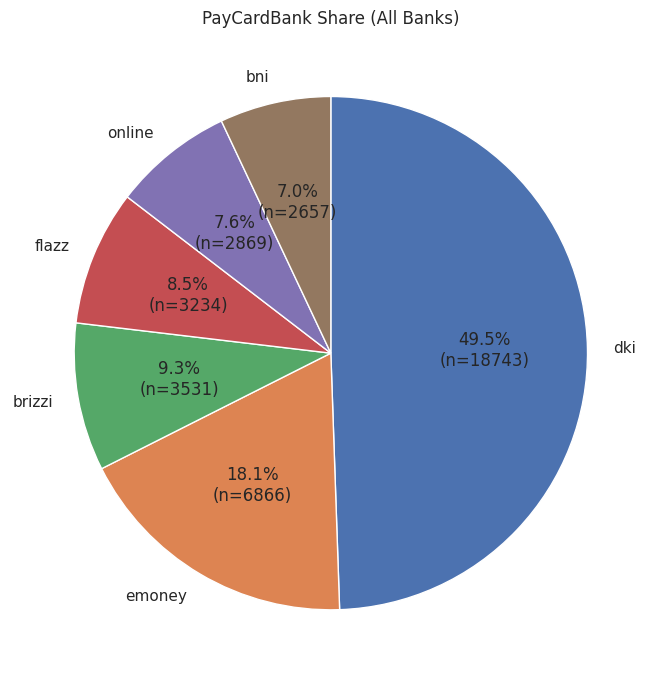

In [106]:
bank_counts_all = (
    dfclean['payCardBank']
    .value_counts(dropna=False)
    .rename_axis('payCardBank')
    .reset_index(name='trips')
)

top2_banks = bank_counts_all.head(2)
print("Top 2 most-used banks (raw counts):")
print(top2_banks)

total = bank_counts_all['trips'].sum()

def autopct_with_counts(pct):
    count = int(round(pct/100.0 * total))
    return f'{pct:.1f}%\n(n={count})'

plt.figure(figsize=(7,7))
plt.pie(
    bank_counts_all['trips'],
    labels=bank_counts_all['payCardBank'],
    autopct=autopct_with_counts,
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor':'white'}
)
plt.title("PayCardBank Share (All Banks)")
plt.tight_layout()
plt.show()

**based on the pie-chart we can see;** Most of the users (49.5%) use DKI and eMoney (18.1%)

**Age bin & distributions of costumers**

In [107]:
age_bins   = [-np.inf, 17, 30, 45, 60, np.inf]
age_labels = ['<18', '18-30', '31-45', '46-60', '>60']

dfclean['age_bin'] = pd.cut(
    dfclean['age_2023'],
    bins=age_bins,
    labels=age_labels,
    right=True,
    include_lowest=True
)
summary_age = (
    dfclean['age_bin'].value_counts(dropna=False)
           .reindex(age_labels)
           .rename_axis('age_bin')
           .to_frame('count')
)
summary_age

,count
age_bin,
<18,5412
18-30,10851
31-45,15486
46-60,5378
>60,773


In [108]:
summary_age['count'] = summary_age['count'].fillna(0).astype(int)

total = summary_age['count'].sum()
summary_age['percentage'] = (summary_age['count'] / total * 100).round(2)

summary_age

age_with_unknown = (dfclean['age_bin']
                    .astype('category')
                    .cat.add_categories(['Unknown'])
                    .fillna('Unknown'))

summary_age_all = (age_with_unknown.value_counts()
                   .reindex(age_labels + ['Unknown'])
                   .rename_axis('age_bin')
                   .to_frame('count'))

summary_age_all['percentage'] = (
    summary_age_all['count'] / summary_age_all['count'].sum() * 100
).round(2)

summary_age_all


,count,percentage
age_bin,,
<18,5412,14.28
18-30,10851,28.63
31-45,15486,40.86
46-60,5378,14.19
>60,773,2.04
Unknown,0,0.00


**Trip Duration**

In [109]:
import numpy as np
import pandas as pd

in_col  = 'tapInTime'  if 'tapInTime'  in dfclean.columns else 'TapInTime'
out_col = 'tapOutTime' if 'tapOutTime' in dfclean.columns else 'TapOutTime'

dfclean[in_col]  = pd.to_datetime(dfclean[in_col],  errors='coerce')
dfclean[out_col] = pd.to_datetime(dfclean[out_col], errors='coerce')

dfclean['trip_duration_min'] = (dfclean[out_col] - dfclean[in_col]).dt.total_seconds() / 60


dfclean.loc[dfclean['trip_duration_min'] <= 0, 'trip_duration_min'] = np.nan

trip_bins = [0, 30, 60, 90, 120, 240]
trip_labels = ['very_short (<30)',
               'short (30-60)',
               'medium (61-90)',
               'long (91-120)',
               'very_long (121-240)']

dfclean['trip_bin'] = pd.cut(
    dfclean['trip_duration_min'],
    bins=trip_bins,
    labels=trip_labels,
    right=True,
    include_lowest=False
)

trip_summary = (dfclean['trip_bin'].value_counts(dropna=False)
                .rename_axis('trip_bin')
                .to_frame('count'))
trip_summary['percentage'] = (trip_summary['count'] / trip_summary['count'].sum() * 100).round(2)
print(trip_summary)


                     count  percentage
trip_bin                              
medium (61-90)       12446       32.84
long (91-120)        11301       29.82
short (30-60)        11152       29.42
very_short (<30)      2896        7.64
very_long (121-240)    105        0.28


**Total Trips during April 2023**

In [110]:
total_trips = dfclean.shape[0]
print("Total Trips:", total_trips)


Total Trips: 37900


**Total Revenue**

In [111]:
total_revenue = dfclean['payAmount'].sum()
print("Total Revenue (Rp):", total_revenue)


Total Revenue (Rp): 103125000.0


**Summary**
1. Throughout April 2023, there are 2000 users.
2. The top 3 of age of the customers are between 31-45, ans 18-30.
3. And the **total revenue** is in Rp103.125.000
4. Most **used banks** are DKI (49.5%) and eMoney. Which means, just put the MDR/Interchange focusing on DKI as eMoney can be top up through phone. It can be cost optimization.
5. The customer take medium trip duration (61-90 minutes) which take 32.8% from total customers. and the long (91-120) and short (30-60) trip duration following after that in 29.8% and 28.4%.

## **Section 2. Time of Date & Trip Pattern**

Reason we do analysis on this because;
* Shows demand patterns across time and corridors.
* Helps identify peak commuting corridors, potential for service adjusments, and low-usage corridors for cost efficiency.

**a. Trips by corridorID x Hour (weekday)**

In [112]:
weekday_df = dfclean[dfclean['weekday_bin'] == 1]

trips_corridor_hour_weekday = (
    weekday_df
    .groupby(['corridorID', 'hour_bin'])
    .size()
    .reset_index(name='trip_count')
)

trips_corridor_hour_weekday = trips_corridor_hour_weekday.sort_values(
    by=['corridorID', 'hour_bin']
)

print(trips_corridor_hour_weekday.head(20))




   corridorID                  hour_bin  trip_count
0           1  Early morning (00-05:59)          23
1           1        Morning (06-08:59)          80
2           1         Midday (09-12:59)          17
3           1      Afternoon (13-16:59)          18
4           1        Evening (17-19:59)          79
5           1          Night (20-23:59)          24
6          10  Early morning (00-05:59)          11
7          10        Morning (06-08:59)          27
8          10         Midday (09-12:59)           7
9          10      Afternoon (13-16:59)          16
10         10        Evening (17-19:59)          20
11         10          Night (20-23:59)          10
12        10A  Early morning (00-05:59)           0
13        10A        Morning (06-08:59)          47
14        10A         Midday (09-12:59)          18
15        10A      Afternoon (13-16:59)           2
16        10A        Evening (17-19:59)          38
17        10A          Night (20-23:59)          25
18        10

/tmp/ipython-input-3885756251.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['corridorID', 'hour_bin'])


The data above is still not readble, that's why we sorted it out based on hour bins to make it more easier to read.

In [113]:
pivot_corridor_hour_weekday = (
    weekday_df
    .groupby(['corridorID', 'hour_bin'])
    .size()
    .reset_index(name='trip_count')
    .pivot(index='corridorID', columns='hour_bin', values='trip_count')
    .fillna(0)
)

print(pivot_corridor_hour_weekday.head(10))


hour_bin    Early morning (00-05:59)  Morning (06-08:59)  Midday (09-12:59)  \
corridorID                                                                    
1                                 23                  80                 17   
10                                11                  27                  7   
10A                                0                  47                 18   
10B                               11                  41                 12   
10D                               30                  42                  8   
10H                                0                  42                 18   
10K                                6                  42                 14   
11                                25                  30                  5   
11B                                0                  25                  9   
11C                                0                  17                  5   

hour_bin    Afternoon (13-16:59)  Evening (17-19:59

/tmp/ipython-input-4166243440.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['corridorID', 'hour_bin'])


After that, as the data is more readble (above), we convert it to percentage. So we know the proportion of hour_bin

In [114]:
pivot_corridor_hour_weekday = (
    weekday_df
    .groupby(['corridorID', 'hour_bin'])
    .size()
    .reset_index(name='trip_count')
    .pivot(index='corridorID', columns='hour_bin', values='trip_count')
    .fillna(0)
)


pivot_corridor_hour_weekday_pct = pivot_corridor_hour_weekday.div(
    pivot_corridor_hour_weekday.sum(axis=1), axis=0
) * 100

print(pivot_corridor_hour_weekday_pct.head(5))


hour_bin    Early morning (00-05:59)  Morning (06-08:59)  Midday (09-12:59)  \
corridorID                                                                    
1                           9.543568           33.195021           7.053942   
10                         12.087912           29.670330           7.692308   
10A                         0.000000           36.153846          13.846154   
10B                         8.461538           31.538462           9.230769   
10D                        18.633540           26.086957           4.968944   

hour_bin    Afternoon (13-16:59)  Evening (17-19:59)  Night (20-23:59)  
corridorID                                                              
1                       7.468880           32.780083          9.958506  
10                     17.582418           21.978022         10.989011  
10A                     1.538462           29.230769         19.230769  
10B                     9.230769           28.461538         13.076923  
10D     

/tmp/ipython-input-2069937257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['corridorID', 'hour_bin'])


**b. Trips by Corridor ID x Hour (weekend)**

In [115]:
weekend_df = dfclean[dfclean['weekend_bin'] == 1].copy()

corridor_col = 'corridorID_filled' if 'corridorID_filled' in dfclean.columns else 'corridorID'

pivot_corridor_hour_weekend = (
    weekend_df
    .groupby([corridor_col, 'hour_bin'])
    .size()
    .reset_index(name='trip_count')
    .pivot(index=corridor_col, columns='hour_bin', values='trip_count')
    .fillna(0)
)

if pd.api.types.is_categorical_dtype(dfclean['hour_bin']):
    col_order = list(dfclean['hour_bin'].cat.categories)
    pivot_corridor_hour_weekend = pivot_corridor_hour_weekend.reindex(columns=col_order, fill_value=0)

pivot_corridor_hour_weekend['Total'] = pivot_corridor_hour_weekend.sum(axis=1)

print("WEEKEND: Trips by corridor × hour_bin:")
print(pivot_corridor_hour_weekend.head(10))
print("\nTop 10 corridors by WEEKEND total volume:")
print(pivot_corridor_hour_weekend['Total'].sort_values(ascending=False).head(10))

pivot_corridor_hour_weekend_pct = (
    pivot_corridor_hour_weekend
    .drop(columns='Total')
    .div(pivot_corridor_hour_weekend.drop(columns='Total').sum(axis=1), axis=0) * 100
)

print("\nWEEKEND: Trips by corridor × hour_bin (percentages)")
print(pivot_corridor_hour_weekend_pct.head(5))


WEEKEND: Trips by corridor × hour_bin:
hour_bin    Early morning (00-05:59)  Morning (06-08:59)  Midday (09-12:59)  \
corridorID                                                                    
1                                  1                   1                  1   
10                                 0                   6                  3   
10A                                1                   4                  5   
10B                                1                   3                  3   
10D                                0                   1                  0   
10H                                0                   4                  2   
10K                                1                   6                  5   
11                                 2                   2                  3   
11B                                4                   5                  6   
11C                                0                   1                  3   

hour_bin    

/tmp/ipython-input-2173848989.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([corridor_col, 'hour_bin'])
/tmp/ipython-input-2173848989.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dfclean['hour_bin']):


**Bar Chart Between Weekday vs Weekend based on Top 10 busiest CorridorID**

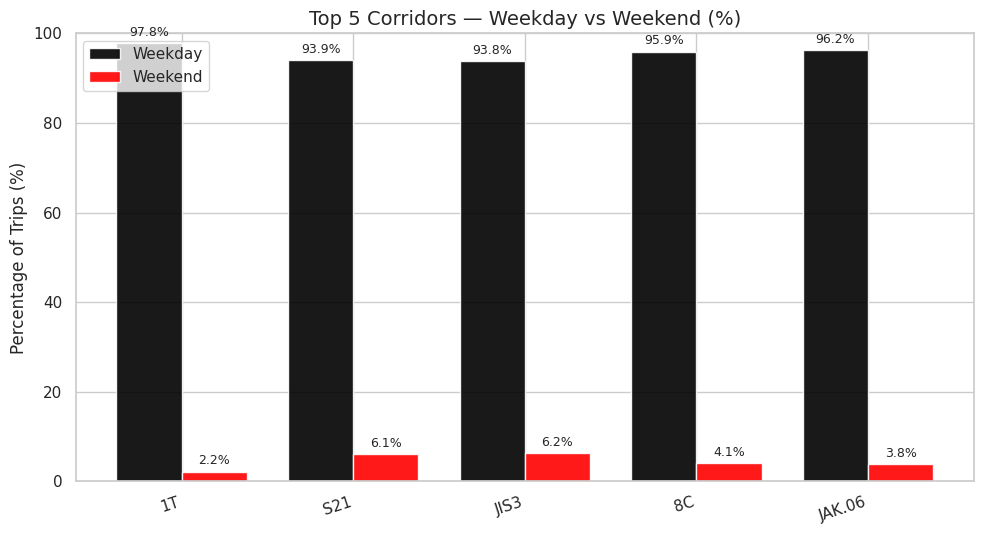

In [116]:
import matplotlib.pyplot as plt
weekend_color = 'red'
weekday_color = 'black'

df_ = dfclean.copy()
df_['corridorID'] = df_['corridorID'].astype(str)

top_corridors = (
    df_['corridorID']
      .value_counts()
      .head(5)
      .index
      .tolist()
)

df_top = df_[df_['corridorID'].isin(top_corridors)].copy()
df_top['day_type'] = np.where(df_top['weekend_bin'] == 1, 'Weekend', 'Weekday')

if 'corridorName_filled' in df_top.columns:
    name_map = (df_top[['corridorID','corridorName_filled']]
                .drop_duplicates()
                .set_index('corridorID')['corridorName_filled']
                .to_dict())
else:
    name_map = {cid: cid for cid in top_corridors}

counts = (
    df_top.groupby(['corridorID','day_type'])
          .size()
          .unstack(fill_value=0)
)

for col in ['Weekday','Weekend']:
    if col not in counts.columns:
        counts[col] = 0

order = counts.sum(axis=1).sort_values(ascending=False).index.tolist()
counts = counts.loc[order]

pct = counts.div(counts.sum(axis=1).replace(0, np.nan), axis=0).fillna(0) * 100

x_labels = [name_map[cid] for cid in counts.index]

x = np.arange(len(x_labels))
width = 0.38

fig, ax = plt.subplots(figsize=(10, 5.5))
bars_weekday = ax.bar(x - width/2, pct['Weekday'].values, width,
                      label='Weekday', color=weekday_color, alpha=0.9)
bars_weekend = ax.bar(x + width/2, pct['Weekend'].values, width,
                      label='Weekend', color=weekend_color, alpha=0.9)

ax.set_title('Top 5 Corridors — Weekday vs Weekend (%)', fontsize=14)
ax.set_ylabel('Percentage of Trips (%)')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=18, ha='right')
ax.set_ylim(0, 100)
ax.legend()

def add_labels(bars):
    for b in bars:
        h = b.get_height()
        ax.text(b.get_x() + b.get_width()/2, h + 1,
                f'{h:.1f}%', ha='center', va='bottom', fontsize=9)

add_labels(bars_weekday)
add_labels(bars_weekend)

plt.tight_layout()
plt.show()



**It means**, based on the bar chart the trips are mostly done in weekday. The top 2 highest percentage on weekend are in JIS (Harmoni-JIS)  3  corridorID S21 (Ciputat-CSW). It's because the route covers many shopping center and also cinnect Terminal Ciputat with M Bloc Space (a plave to hanogout)

**c. Heatmap corridor x Hour (Top 5)**

/tmp/ipython-input-2298621560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = dfclean.groupby(['corridorID', 'hour_bin']).size().reset_index(name='count')


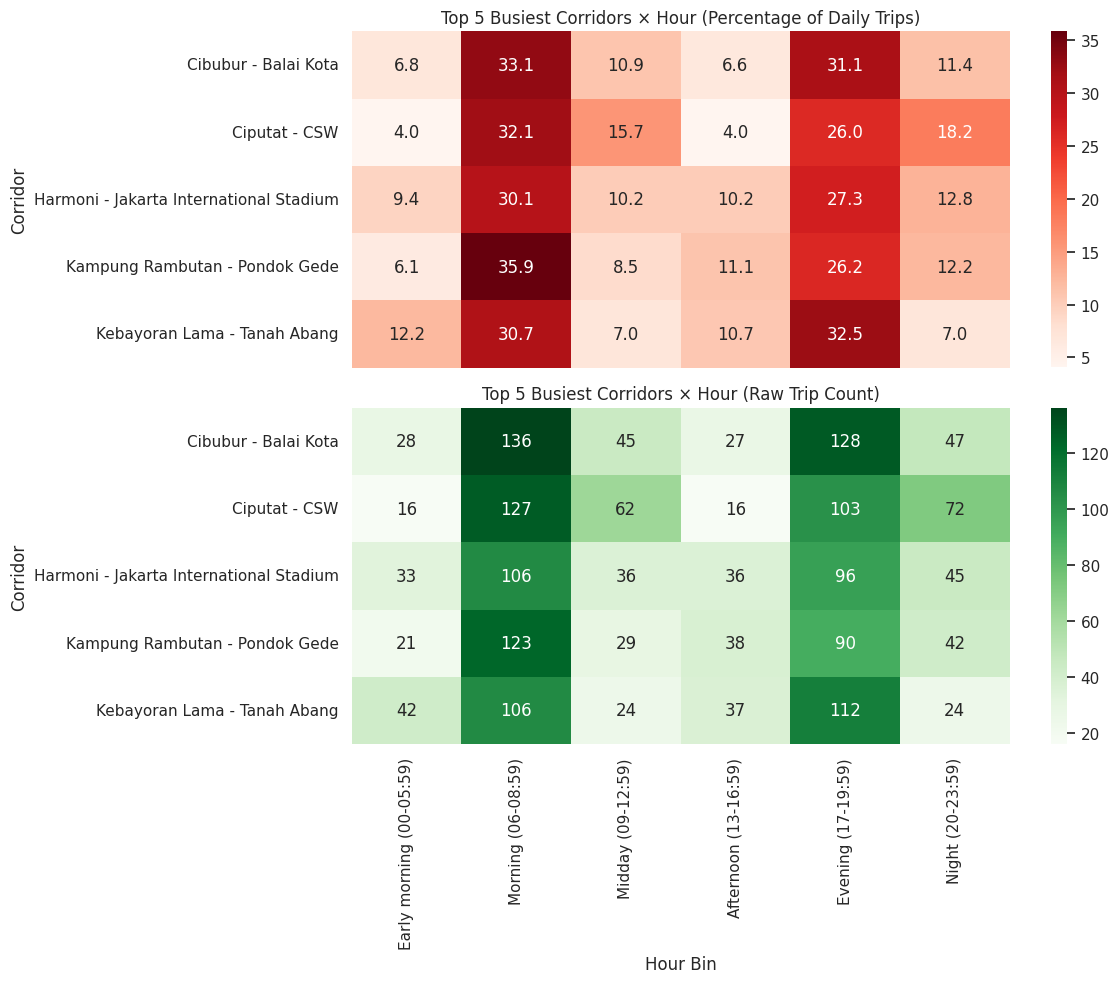

In [117]:
heatmap_data = dfclean.groupby(['corridorID', 'hour_bin']).size().reset_index(name='count')
heatmap_data['pct'] = heatmap_data.groupby('corridorID')['count'].transform(lambda x: x / x.sum() * 100)

corridor_map = dfclean.set_index('corridorID')['corridorName'].to_dict()

heatmap_data['corridorName'] = heatmap_data['corridorID'].map(corridor_map)

top5_corridors = dfclean.groupby('corridorID').size().nlargest(5).index

top5_data = heatmap_data[heatmap_data['corridorID'].isin(top5_corridors)]

pivot_top5_pct = top5_data.pivot(index='corridorName', columns='hour_bin', values='pct')
pivot_top5_count = top5_data.pivot(index='corridorName', columns='hour_bin', values='count')

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

sns.heatmap(pivot_top5_pct, cmap="Reds", annot=True, fmt=".1f", ax=axes[0])
axes[0].set_title("Top 5 Busiest Corridors × Hour (Percentage of Daily Trips)")
axes[0].set_ylabel("Corridor")
axes[0].set_xlabel("")


sns.heatmap(pivot_top5_count, cmap="Greens", annot=True, fmt=".0f", ax=axes[1])
axes[1].set_title("Top 5 Busiest Corridors × Hour (Raw Trip Count)")
axes[1].set_ylabel("Corridor")
axes[1].set_xlabel("Hour Bin")

plt.tight_layout()
plt.show()


In [118]:
total_trips = dfclean.groupby('corridorName').size().sort_values(ascending=False)

print("Total trips for all corridors:")
print(total_trips.head(5))


Total trips for all corridors:
corridorName
Cibubur - Balai Kota                       411
Ciputat - CSW                              396
Pulo Gadung - Monas                        356
Harmoni - Jakarta International Stadium    352
Kalideres - Bundaran HI via Veteran        350
dtype: int64


For further exploration, we want to know the age_bin on the Top 5 busiest corridors.

In [119]:
top5_names = [
    "Cibubur - Balai Kota",
    "Ciputat - CSW",
    "Pulo Gadung - Monas",
    "Harmoni - Jakarta International Stadium",
    "Kalideres - Bundaran HI via Veteran"
]

corridor_col = 'corridorName_filled' if 'corridorName_filled' in dfclean.columns else 'corridorName'

age_labels = ['<18', '18-30', '31-45', '46-60', '>60']
if 'age_bin' in dfclean.columns:
    dfclean['age_bin'] = pd.Categorical(dfclean['age_bin'], categories=age_labels, ordered=True)
else:
    raise ValueError("age_bin not found. Please create dfclean['age_bin'] first.")

present_corridors = [c for c in top5_names if c in dfclean[corridor_col].unique()]
if not present_corridors:
    raise ValueError("None of the provided top 5 corridor names are found in the dataframe.")

df_top5 = dfclean[dfclean[corridor_col].isin(present_corridors)].copy()

age_counts = (
    df_top5
      .groupby([corridor_col, 'age_bin'])
      .size()
      .reset_index(name='count')
)

print("Raw counts of each age_bin in Top 5 busiest corridors:")
print(age_counts.sort_values([corridor_col, 'age_bin']))

age_counts['percentage'] = (
    age_counts.groupby(corridor_col)['count']
              .transform(lambda x: x / x.sum() * 100)
)

print("\nPercentage distribution of age bins in Top 5 busiest corridors:")
print(age_counts.sort_values([corridor_col, 'age_bin']))

pivot_pct = pd.pivot_table(
    data=age_counts,
    index=corridor_col,
    columns='age_bin',
    values='percentage',
    aggfunc='sum',
    fill_value=0
)

pivot_pct = pivot_pct.reindex(index=present_corridors)
pivot_pct = pivot_pct.reindex(columns=age_labels)


Raw counts of each age_bin in Top 5 busiest corridors:
                               corridorName age_bin  count
0                      Cibubur - Balai Kota     <18    122
1                      Cibubur - Balai Kota   18-30    121
2                      Cibubur - Balai Kota   31-45    167
3                      Cibubur - Balai Kota   46-60      1
4                      Cibubur - Balai Kota     >60      0
5                             Ciputat - CSW     <18     80
6                             Ciputat - CSW   18-30    129
7                             Ciputat - CSW   31-45    101
8                             Ciputat - CSW   46-60     86
9                             Ciputat - CSW     >60      0
10  Harmoni - Jakarta International Stadium     <18     41
11  Harmoni - Jakarta International Stadium   18-30     85
12  Harmoni - Jakarta International Stadium   31-45    179
13  Harmoni - Jakarta International Stadium   46-60     47
14  Harmoni - Jakarta International Stadium     >60      0
1

/tmp/ipython-input-2196075456.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([corridor_col, 'age_bin'])
/tmp/ipython-input-2196075456.py:41: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_pct = pd.pivot_table(


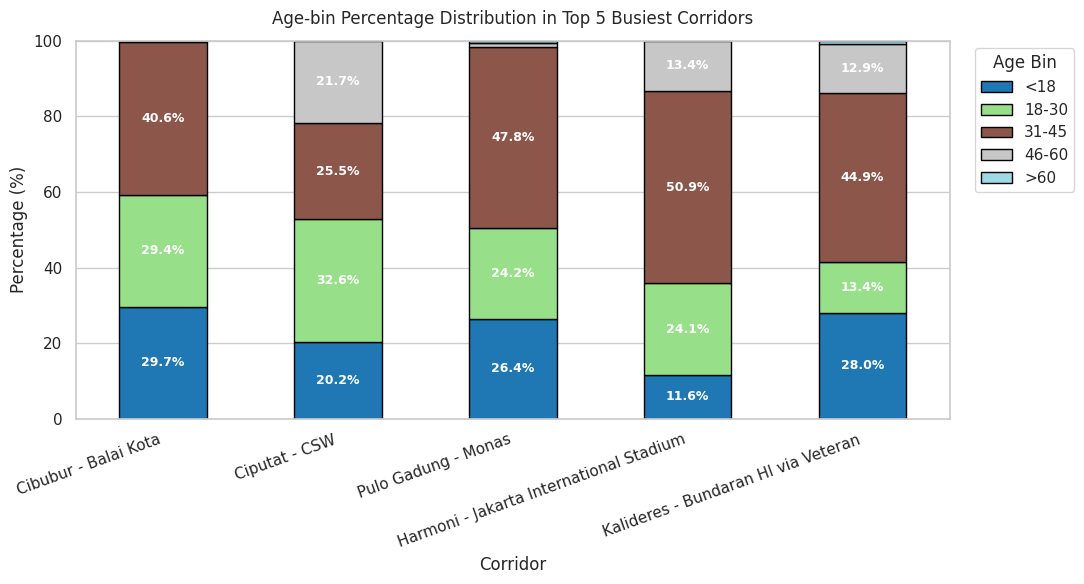

In [120]:
ax = pivot_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(11, 6),
    colormap='tab20',
    edgecolor='black'
)

ax.set_title("Age-bin Percentage Distribution in Top 5 Busiest Corridors", pad=12)
ax.set_xlabel("Corridor")
ax.set_ylabel("Percentage (%)")
ax.set_ylim(0, 100)
plt.xticks(rotation=20, ha='right')
plt.legend(title="Age Bin", bbox_to_anchor=(1.02, 1), loc='upper left')

for container in ax.containers:
    labels = [f"{v:.1f}%" if v >= 2 else "" for v in container.datavalues]  # show only >= 2%
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='white', weight='bold')

plt.tight_layout()
plt.show()

Based on the two heatmaps (that containts the same things) and one bar plot above, we can see the top one (red) shows the percentage for the 5 busiest corridors across different hours, while the bottom heatmap (green) shows the raw trip count for the same data.


 **Morning hour (06:00-08:59)**,
 *  is the busiest time slot between the other. All the top5 busiest corridors show their highest usage in this slot, ranging from 30-36% of traffic.
 * It indicates strong commuter flow into central Jakarta during morning rush.
 * **Kampung Rambutan - Pondok Gede** corridor having the highest percentage of trips (35.9%) and **the Cibubur - Balai Kota corridor having the highest raw** count of trips (136).

**Evening Peak (around 5th slot, ranging 17:00-19:00)**

 * Another strong peak, with percentages 26-32% across corridors.
 * Kby. Lama - Tn. Abang, oarticulary high (32.5%) showing outbound evening demand.
 * The **Kby Lama - Tn. Abang **corridor sees its peak percentage (32.5%), while the **Cibubur - Balai Kota** corridor again has the highest raw count (128).

**Midday Usage (09:00-12:59)**
 * Considerably lower usage (7-15%) compared to morning and evening.
 * Ciputat-CSW has the highest midday share (15.7%), possible due to mixed business/leisure trave. Based on Transjakarta website and instagram (@infotije), it's becaused on the route there are many famous stops for leisure or places for business meetings. As it passed Pondok Indah Mall (1,3), Melawai Plaza, Hotel Melawai, Ranch Market Pondok Indah, Lebakbulus, and MRT Blok M



**In short;**

the analysis of the two heatmaps revealts that while all top corridors follow a similar pattern of being busiest during morning and evening rush hours. **Is it also because the majority of the customers are on age range between 18-30 and 31-40** that dominates most of the corridor. However there is highest different number between raw counts and percentage is because the percentage heatmaps shows the distribution of trips for each individual corridor, while the raw count heaetmap shows the actual number of trips (which measure of a corridor's overall volume).

**for stakeholders:**
* overall busiest periods: are the morning rush (6:00-8:59) and the evening rush (17:00=19:59).
* highest volume corridor is **Cibubur - Balai Kota**. Most critical to manage, as it carriest the highest volume (based on raw numbers) of trips during both morning and evening peaks.
* Most concentrated Peak: **Kp. Rambutan - Pd. Gede**, has the most concentrated morning rush, with nearly 36% of its total daily trips occuring in hour_bin. This indicated a high dependency on morning commuters.


**What's next?**

1. Prioritize the Cibubur - Balai Kota corridor:
    * **increase capacity**, as it shown has the biggest volumes, which this corridor is the most strained. recommend adding more buses, increasing frequency.

2. **Optimize Morning Peak service for Kp. Rambutan - Pd. Gede**
  * **focus on reliatbility**, since this corridor has the most concentrated morning peak (35.9% of its total trips), the service during this time is critical. Focus on ensuring reliablity and punctuality during these specific hours.
  * **explore demand-response solutions:** analyze the remaining 64.% of trips that occur outisde of the peak to see if flexible, on-demand services could be a more cost-effective solution during off-peak hours compared to a fixed schedule.

3. **consider all-day service imporivements:**
  * while rush hours are a priority, the data shows a consistent level of activity in the midday and afternoon hours. The **Harmoni - Jakarta International Stadium** corridor has a more distributed trip pattern. This suggests opportunities to imporove the all-day service quality and attract more off-peak passangers.

**d. Peak Time TapInTime & TapOutTime**

In [121]:
tapin_counts = (
    dfclean.groupby("hour_bin")["tapInTime"]
    .count()
    .reset_index(name="TapIn_Count")
)

tapout_counts = (
    dfclean.groupby("hour_bin")["tapOutTime"]
    .count()
    .reset_index(name="TapOut_Count")
)


tap_time_comparison = pd.merge(
    tapin_counts, tapout_counts, on="hour_bin", how="outer"
)

tap_time_comparison["TapIn_Count"] = tap_time_comparison["TapIn_Count"].fillna(0).astype(int)
tap_time_comparison["TapOut_Count"] = tap_time_comparison["TapOut_Count"].fillna(0).astype(int)

tap_time_comparison


/tmp/ipython-input-1211665716.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfclean.groupby("hour_bin")["tapInTime"]
/tmp/ipython-input-1211665716.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfclean.groupby("hour_bin")["tapOutTime"]


,hour_bin,TapIn_Count,TapOut_Count
0,Early morning (00-05:59),3358,3358
1,Morning (06-08:59),11531,11531
2,Midday (09-12:59),3782,3782
3,Afternoon (13-16:59),4302,4302
4,Evening (17-19:59),10381,10381
5,Night (20-23:59),4546,4546


To make it more readable, we make it to chart

/tmp/ipython-input-3595671893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tapin_counts  = dfclean.groupby("hour_bin")["tapInTime"].count().reset_index(name="TapIn_Count")
/tmp/ipython-input-3595671893.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tapout_counts = dfclean.groupby("hour_bin")["tapOutTime"].count().reset_index(name="TapOut_Count")


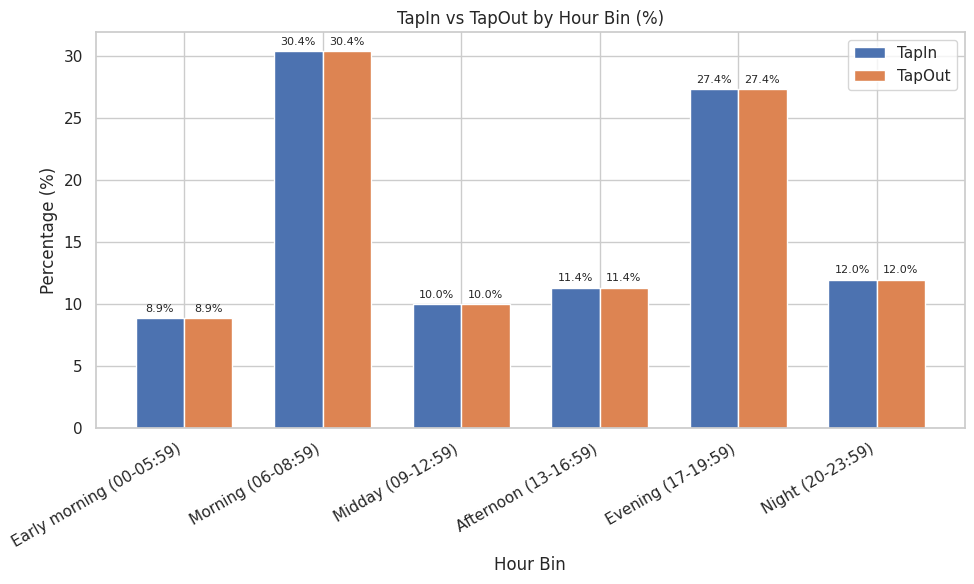

In [122]:
tapin_counts  = dfclean.groupby("hour_bin")["tapInTime"].count().reset_index(name="TapIn_Count")
tapout_counts = dfclean.groupby("hour_bin")["tapOutTime"].count().reset_index(name="TapOut_Count")

tap_time_comparison = pd.merge(tapin_counts, tapout_counts, on="hour_bin", how="outer")

tap_time_comparison["TapIn_pct"]  = tap_time_comparison["TapIn_Count"]  / tap_time_comparison["TapIn_Count"].sum()  * 100
tap_time_comparison["TapOut_pct"] = tap_time_comparison["TapOut_Count"] / tap_time_comparison["TapOut_Count"].sum() * 100

x = np.arange(len(tap_time_comparison["hour_bin"]))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, tap_time_comparison["TapIn_pct"], width, label="TapIn")
bars2 = ax.bar(x + width/2, tap_time_comparison["TapOut_pct"], width, label="TapOut")


ax.set_xlabel("Hour Bin")
ax.set_ylabel("Percentage (%)")
ax.set_title("TapIn vs TapOut by Hour Bin (%)")
ax.set_xticks(x)
ax.set_xticklabels(tap_time_comparison["hour_bin"], rotation=30, ha="right")
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.1f}%",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3), textcoords="offset points",
                    ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


**Summary**
* Demand is **commuter-shaped**: morning (6-8:59) and evening (17-19:59)which if its combined (30.4% and 27.4%) will be ~58% of all events.
* Midday at around 10%, Afternoon at 11.4% and Night at 12% which shows steady but lighter volumes.
* Early morning is lowest at 8.9%
* TapIn and TapOut percentages are identical which

**Insights**
1. **peak operations**: add more units, tighter headways, and crowd control (06.00-09.00 and 17:00-20.00), consider express/limited-stop runs.
2.**off-peak optimization**, reduce frequency between 09:00-16:59, and we can schedule cleaning or maintenance 00:00-05:59.

## **Section 3. Safety, Comfort & Accessibility**

The purpose we're doing analysis on this section is;
* detect risk windows and undeserved cohorts (by hour/weekday/weekend) and validate patterns statistically to justify interventions.
* Guide staffing, lighting/CCTV, and service adjustments that improve perceived safety and equitable access.

**a. Gender Distribution on Hour Bins**

based on TapInTime. The reason why we used TapInTime is, because usually people might be arrived earlier to wait for the bus. And we want to analyze the behaviour of the customers based on **when they start their journey**

In [123]:
print(dfclean.columns)

Index(['tapOutStops', 'corridorName', 'tapOutStopsName', 'stopEndSeq',
       'tapOutTime', 'corridorID', 'tapInStops', 'payAmount', 'payCardID',
       'transID', 'direction', 'payCardName', 'payCardSex', 'payCardBirthDate',
       'payCardBank', 'tapInTime', 'tapInStopsName', 'stopStartSeq',
       'age_2023', 'age_bin', 'trip_duration_min', 'duration_flag', 'hour_bin',
       'weekend_bin', 'weekday_bin', 'week_bin', 'trip_bin'],
      dtype='object')


In [124]:
raw_counts = (
    dfclean
    .groupby(['hour_bin', 'payCardSex'])
    .size()
    .unstack(fill_value=0)
)

percentages = raw_counts.div(raw_counts.sum(axis=1), axis=0) * 100

summary = raw_counts.copy()
summary['F_pct'] = percentages['F']
summary['M_pct'] = percentages['M']

print(summary.reset_index())

payCardSex                  hour_bin     F     M      F_pct      M_pct
0           Early morning (00-05:59)  1674  1684  49.851102  50.148898
1                 Morning (06-08:59)  6147  5384  53.308473  46.691527
2                  Midday (09-12:59)  2090  1692  55.261766  44.738234
3               Afternoon (13-16:59)  2228  2074  51.789865  48.210135
4                 Evening (17-19:59)  5506  4875  53.039206  46.960794
5                   Night (20-23:59)  2512  2034  55.257369  44.742631


/tmp/ipython-input-3264879372.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['hour_bin', 'payCardSex'])


/tmp/ipython-input-4215158442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  raw_counts = dfclean.groupby(['hour_bin', 'payCardSex']).size().unstack(fill_value=0)


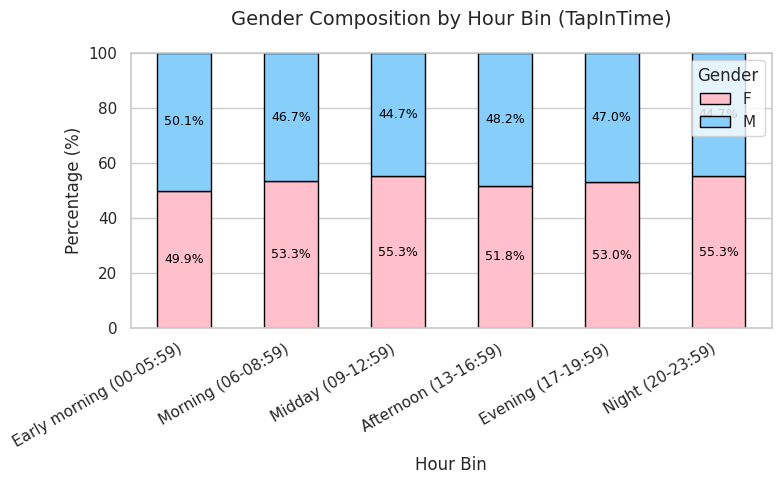

In [125]:
raw_counts = dfclean.groupby(['hour_bin', 'payCardSex']).size().unstack(fill_value=0)

percentages = raw_counts.div(raw_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(8, 5))

bars = percentages.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color={"F": "#FFC0CB", "M": "#87CEFA"},
    edgecolor="black"
)

ax.set_title("Gender Composition by Hour Bin (TapInTime)", fontsize=14, pad=20)
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Hour Bin")
ax.legend(title="Gender")
ax.set_ylim(0, 100)
plt.xticks(rotation=30, ha="right")

for container in bars.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=9, color="black")

plt.tight_layout()
plt.show()



**b. Female vs Male ratio (Weekday vs weekend)**

In [126]:
if 'day_type' not in dfclean.columns:
    dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'], errors='coerce')
    dfclean['day_type'] = np.where(dfclean['tapInTime'].dt.weekday < 5, 'Weekday', 'Weekend')

counts = (
    dfclean
      .groupby(['day_type', 'payCardSex'])
      .size()
      .unstack(fill_value=0)
      .reindex(index=['Weekday', 'Weekend'], columns=['F','M'], fill_value=0)
)

summary = counts.copy()
summary['Total'] = summary.sum(axis=1)
summary['F_pct'] = (summary['F'] / summary['Total'] * 100).round(2).replace([np.inf, -np.inf], 0)
summary['M_pct'] = (summary['M'] / summary['Total'] * 100).round(2).replace([np.inf, -np.inf], 0)

print("Gender distribution by day type (raw counts and percentages):")
print(summary.reset_index())


Gender distribution by day type (raw counts and percentages):
payCardSex day_type      F      M  Total  F_pct  M_pct
0           Weekday  18140  16058  34198  53.04  46.96
1           Weekend   2017   1685   3702  54.48  45.52


/tmp/ipython-input-579393492.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts.groupby('day_type')['count']


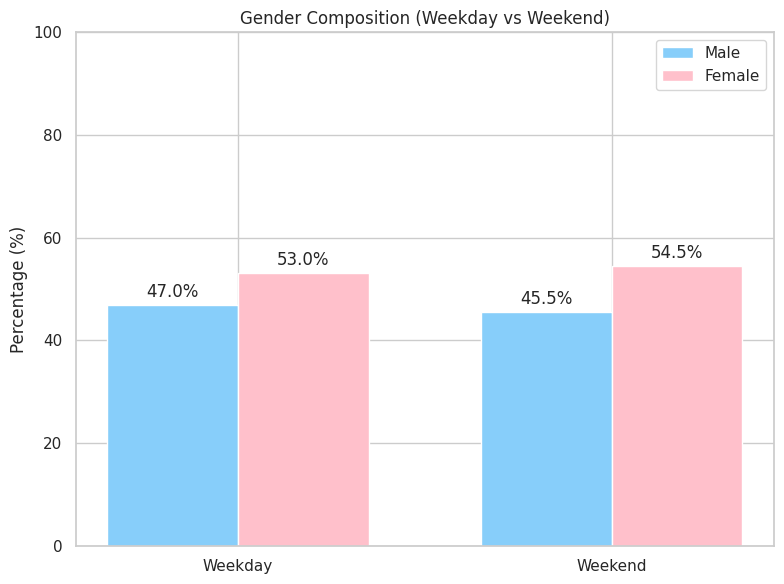

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


counts = (
    dfclean.groupby(['day_type', 'payCardSex'])
           .size()
           .reset_index(name='count')
)

counts['day_type'] = pd.Categorical(counts['day_type'],
                                    categories=['Weekday', 'Weekend'],
                                    ordered=True)
counts['payCardSex'] = pd.Categorical(counts['payCardSex'],
                                      categories=['M', 'F'],
                                      ordered=True)


counts['pct'] = (
    counts.groupby('day_type')['count']
          .transform(lambda x: x / x.sum() * 100)
)

pct_wide = counts.pivot(index='day_type', columns='payCardSex', values='pct') \
                 .reindex(index=['Weekday', 'Weekend'], columns=['M', 'F']) \
                 .fillna(0)

counts_wide = counts.pivot(index='day_type', columns='payCardSex', values='count') \
                    .reindex(index=['Weekday', 'Weekend'], columns=['M', 'F']) \
                    .fillna(0)

x = np.arange(len(pct_wide.index))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars_m = ax.bar(x - width/2, pct_wide['M'], width, label='Male',   color='#87CEFA')
bars_f = ax.bar(x + width/2, pct_wide['F'], width, label='Female', color='#FFC0CB')

ax.set_title("Gender Composition (Weekday vs Weekend)")
ax.set_ylabel("Percentage (%)")
ax.set_xticks(x, pct_wide.index)
ax.set_ylim(0, 100)
ax.legend()

ax.bar_label(bars_m, fmt='%.1f%%', padding=3)
ax.bar_label(bars_f, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()



**c. Gender distribution across age bins**

In [128]:
age_gender_counts = (
    dfclean.groupby(['age_bin', 'payCardSex'])
           .size()
           .reset_index(name='count')
)

age_gender_counts_wide = age_gender_counts.pivot(index='age_bin',
                                                 columns='payCardSex',
                                                 values='count').fillna(0)

age_gender_counts['pct'] = (
    age_gender_counts.groupby('age_bin')['count']
                     .transform(lambda x: x / x.sum() * 100)
)

age_gender_pct_wide = age_gender_counts.pivot(index='age_bin',
                                              columns='payCardSex',
                                              values='pct').fillna(0)

print("=== Raw Counts (Male vs Female per Age Bin) ===")
print(age_gender_counts_wide)

print("\n=== Percentages (Male vs Female per Age Bin) ===")
print(age_gender_pct_wide)


=== Raw Counts (Male vs Female per Age Bin) ===
payCardSex     F     M
age_bin               
<18         3485  1927
18-30       6626  4225
31-45       8336  7150
46-60       1616  3762
>60           94   679

=== Percentages (Male vs Female per Age Bin) ===
payCardSex          F          M
age_bin                         
<18         64.393939  35.606061
18-30       61.063496  38.936504
31-45       53.829265  46.170735
46-60       30.048345  69.951655
>60         12.160414  87.839586


/tmp/ipython-input-1540610268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfclean.groupby(['age_bin', 'payCardSex'])
/tmp/ipython-input-1540610268.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts.groupby('age_bin')['count']


/tmp/ipython-input-3868359335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfclean.groupby(['age_bin', 'payCardSex'])
/tmp/ipython-input-3868359335.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts['pct'] = counts.groupby('age_bin')['count'].transform(lambda x: x / x.sum() * 100)


Raw counts (Male/Female) per age_bin:
payCardSex     M     F
age_bin               
<18         1927  3485
18-30       4225  6626
31-45       7150  8336
46-60       3762  1616
>60          679    94

Percentages (Male/Female) per age_bin:
payCardSex      M      F
age_bin                 
<18         35.61  64.39
18-30       38.94  61.06
31-45       46.17  53.83
46-60       69.95  30.05
>60         87.84  12.16


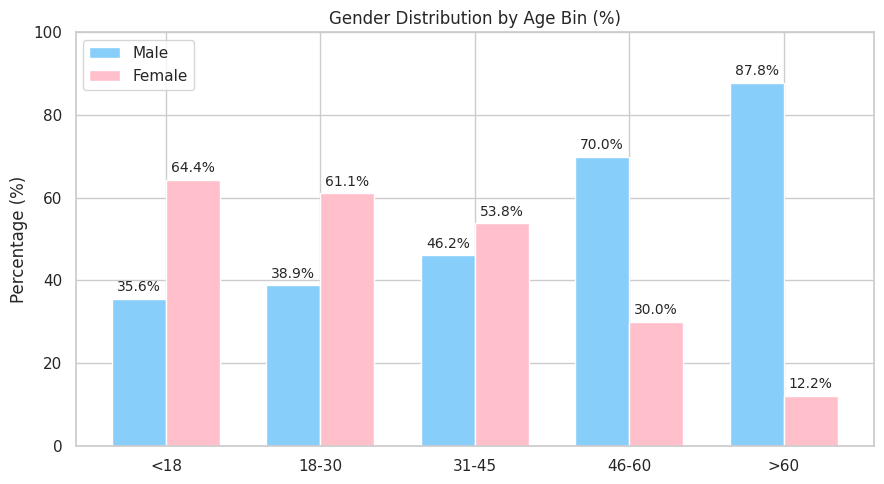

In [129]:
counts = (
    dfclean.groupby(['age_bin', 'payCardSex'])
           .size()
           .reset_index(name='count')
)

age_order = ['<18', '18-30', '31-45', '46-60', '>60']
if 'age_bin' in dfclean.columns:

    present = [a for a in age_order if a in counts['age_bin'].astype(str).unique()]
    if present:
        counts['age_bin'] = pd.Categorical(counts['age_bin'], categories=present, ordered=True)
        counts = counts.sort_values(['age_bin','payCardSex'])

counts_wide = counts.pivot(index='age_bin', columns='payCardSex', values='count').fillna(0).reindex(columns=['M','F'])
print("Raw counts (Male/Female) per age_bin:")
print(counts_wide)

counts['pct'] = counts.groupby('age_bin')['count'].transform(lambda x: x / x.sum() * 100)

pct_wide = counts.pivot(index='age_bin', columns='payCardSex', values='pct').fillna(0).reindex(columns=['M','F'])
print("\nPercentages (Male/Female) per age_bin:")
print(pct_wide.round(2))

x = np.arange(len(pct_wide.index))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
bars_m = ax.bar(x - width/2, pct_wide['M'], width, label='Male',   color='#87CEFA')  # pastel blue
bars_f = ax.bar(x + width/2, pct_wide['F'], width, label='Female', color='#FFC0CB')  # pink

ax.set_title("Gender Distribution by Age Bin (%)")
ax.set_ylabel("Percentage (%)")
ax.set_xticks(x, pct_wide.index.astype(str))
ax.set_ylim(0, 100)
ax.legend()

ax.bar_label(bars_m, labels=[f"{v:.1f}%" for v in pct_wide['M'].values], padding=3, fontsize=10)
ax.bar_label(bars_f, labels=[f"{v:.1f}%" for v in pct_wide['F'].values], padding=3, fontsize=10)

plt.tight_layout()
plt.show()


**d. Is there any correlation between Gender x Hour?** (using Chi-Suqare)

Both variables (gender and hour bins) are categorical. Gender categorical variabels with 2 levels while hour bins categorical variable with multiple level.s

* Chi-square test of indepence is the standard choice becuase;
  * it checks whether there is a statistically significant association between two categorical variables.
* ANOVA is not suitable because it designed for comparing means of continuous variables across categories, not proportions of categorical counts.

**Hypothesis**

H0: Gender distribution is independent of hour bins,the proportion of male and female are same.

H1: Gender distribution depends on hour bins, avarage the proportion of male and female are different.

In [130]:
from scipy.stats import chi2_contingency


gender_col = 'payCardSex'
hour_col   = 'hour_bin'


df_use = dfclean[[gender_col, hour_col]]

crosstab = pd.crosstab(df_use[gender_col], df_use[hour_col])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square:", chi2)
print("p-value   :", p)
print("Degree of Freedom:", dof)

Chi-square: 32.90509329455186
p-value   : 3.9303100877531564e-06
Degree of Freedom: 5


**Summary:**
Gender and hour bin are **depedent** (reject H0). Since the p-value is 0.00000393.

So, there are correlations between hour_bin and gender.

**e. Is there any correlation between Gender x TripDuration?** (t-test)

Use t-test because TripDuration is numeric while gender is categorical with 2 group. It's statistic inferential test. (comparative, parametric)

**hypothesis**

H0: the average trip duration across gender is same.

H1: the average of trip duration across gender is not same.

In [131]:
from scipy.stats import ttest_ind

df_test = dfclean.loc[dfclean['payCardSex'].isin(['F','M'])].copy()

male_durations   = df_test.loc[df_test['payCardSex'] == 'M', 'trip_duration_min']
female_durations = df_test.loc[df_test['payCardSex'] == 'F', 'trip_duration_min']

t_stat, p_value = ttest_ind(male_durations, female_durations, equal_var=False)

print("Independent Samples t-test (TripDuration by Gender)")
print(f"T-statistic : {t_stat:.4f}")
print(f"P-value     : {p_value:.6f}")

print("\nMean TripDuration (Male):", male_durations.mean())
print("Mean TripDuration (Female):", female_durations.mean())

Independent Samples t-test (TripDuration by Gender)
T-statistic : -2.4394
P-value     : 0.014717

Mean TripDuration (Male): 71.77441020762086
Mean TripDuration (Female): 72.4709411438764


**from the t-test, we can see;**
* **t-statistic**: -2.439, which indicates Female >Male (as we order from M-F)
* **Accept H1** which means there is difference in avg between TripDuration and Gender)
* **p-value**: 0.014 which means lower than 0.05

**f. Is there any correlation between Gender x Weekday/Weekend?** (Chi-square)

Use Chi-Square, because both are categoric. It's inferensial (categoric, non-parametric)

**hypothesis**

H0: Gender and Weekend are independent (no correlation)

H1: gender and weekend are not indepent (there is correlation)

In [132]:
from scipy.stats import chi2_contingency

df_test = dfclean.loc[dfclean['payCardSex'].isin(['F','M'])].copy()

ct = pd.crosstab(df_test['payCardSex'], df_test['weekend_bin'])

print("Crosstab (Raw Counts):\n", ct)

chi2, p, dof, expected = chi2_contingency(ct)

print("\nChi-Square Test Results")
print("------------------------")
print("Chi2 Statistic :", chi2)
print("Degrees of Freedom:", dof)
print("P-value        :", p)

print("\nExpected Counts:\n", pd.DataFrame(expected,
                                          index=ct.index,
                                          columns=ct.columns))


Crosstab (Raw Counts):
 weekend_bin      0     1
payCardSex              
F            18140  2017
M            16058  1685

Chi-Square Test Results
------------------------
Chi2 Statistic : 2.724505471224462
Degrees of Freedom: 1
P-value        : 0.0988187246472338

Expected Counts:
 weekend_bin             0            1
payCardSex                            
F            18188.102533  1968.897467
M            16009.897467  1733.102533


Crosstab (Raw Counts):
 weekend_bin  Weekday  Weekend
payCardSex                   
F              18140     2017
M              16058     1685

Chi-Square Test Results
------------------------
Chi2 Statistic : 2.724505471224462
Degrees of Freedom: 1
P-value        : 0.0988187246472338

Expected Counts:
 weekend_bin       Weekday      Weekend
payCardSex                            
F            18188.102533  1968.897467
M            16009.897467  1733.102533


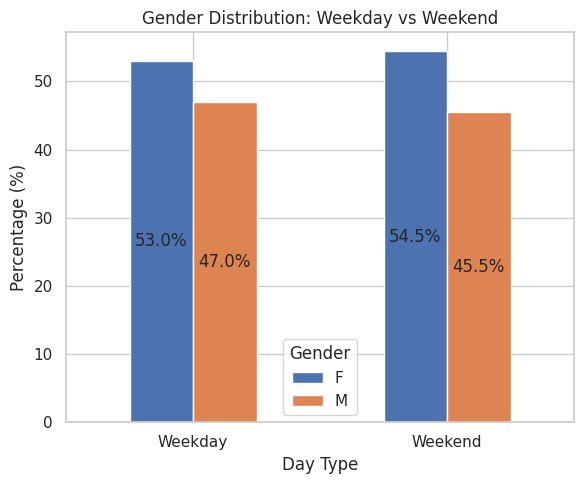

In [133]:
df_test = dfclean.loc[dfclean['payCardSex'].isin(['F','M'])].copy()

ct = pd.crosstab(df_test['payCardSex'], df_test['weekend_bin'])

label_map = {0: 'Weekday', 1: 'Weekend'}
ct = ct.rename(columns=label_map)

print("Crosstab (Raw Counts):\n", ct)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)
print("\nChi-Square Test Results")
print("------------------------")
print("Chi2 Statistic :", chi2)
print("Degrees of Freedom:", dof)
print("P-value        :", p)
print("\nExpected Counts:\n", pd.DataFrame(expected, index=ct.index, columns=ct.columns))

ct_pct = ct.div(ct.sum(axis=0), axis=1) * 100

order = [c for c in ['Weekday','Weekend'] if c in ct_pct.columns]
fig, ax = plt.subplots(figsize=(6,5))
ct_pct[order].T.plot(kind="bar", ax=ax)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

ax.set_title("Gender Distribution: Weekday vs Weekend")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Day Type")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


From the chi-square result above, it shows;
* There is **no association** between gender and weekend. (accept H0)
* The test show there is not significant correlation between gender and weekend/weekday ( p = 0.0988 > 0.05)
* The weekday (0) and weekend (1) bar chart shows the differences in both day type is close.


**Which means;**
1. For ads, they no need worry about it. Can still use ads consistently without worrying the changes of demographic.
2. As **female** consistantly higher than man in both weekend and weekday, make sure the TransJakarta is more woman-friendly. From safety, accessibility, and security (comfortable waiting room, security shifts during early morning and night bin).

**g. Is there any correlation between Age x Weekday/Weekend?** (Chisquare)

Because both are categorical. Statistic inferensial (categoric assosiaction, non-parametric)

**hypothesis**

H0: age bin is independent from weekday/weekend

H1: age bin is dependent on weekday/weekend

In [134]:
import pandas as pd
from scipy.stats import chi2_contingency

crosstab_age_weekend = pd.crosstab(dfclean['age_bin'], dfclean['weekend_bin'])

print("Crosstab (raw counts):")
print(crosstab_age_weekend)

chi2, p, dof, expected = chi2_contingency(crosstab_age_weekend)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)
print("\nExpected Frequencies:")
print(expected)


Crosstab (raw counts):
weekend_bin      0     1
age_bin                 
<18           4856   556
18-30         9761  1090
31-45        14042  1444
46-60         4855   523
>60            684    89

Chi-square Statistic: 8.653520886181841
Degrees of Freedom: 4
p-value: 0.07036796327634524

Expected Frequencies:
[[ 4883.36612137   528.63387863]
 [ 9791.09493404  1059.90506596]
 [13973.35693931  1512.64306069]
 [ 4852.68717678   525.31282322]
 [  697.4948285     75.5051715 ]]


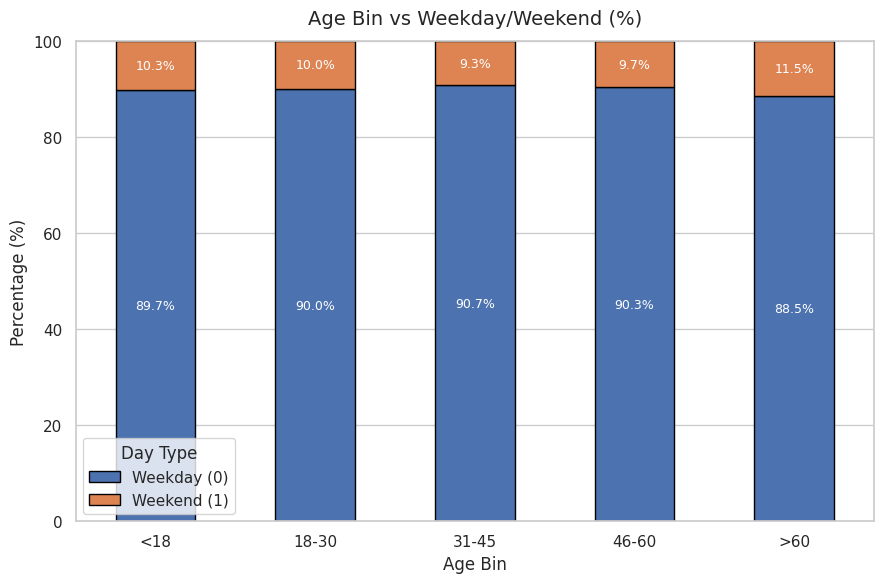

In [135]:
age_order = ['<18', '18-30', '31-45', '46-60', '>60']
if 'age_bin' in dfclean.columns:
    present = [a for a in age_order if a in dfclean['age_bin'].astype(str).unique()]
    if present:
        dfclean['age_bin'] = pd.Categorical(dfclean['age_bin'], categories=present, ordered=True)

ct = pd.crosstab(dfclean['age_bin'], dfclean['weekend_bin']).sort_index()

ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
ct_pct.columns = ['Weekday (0)', 'Weekend (1)']

ax = ct_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
    color=['#4C72B0', '#DD8452'],
    edgecolor='black'
)

ax.set_title("Age Bin vs Weekday/Weekend (%)", fontsize=14, pad=12)
ax.set_xlabel("Age Bin")
ax.set_ylabel("Percentage (%)")
ax.set_ylim(0, 100)
ax.legend(title="Day Type")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()


**Summary:**
* **Accept H0** because p-value > 0.05
* which means, age bin and weekday/weekend is **independent** or not affecting each other.
* The bar plot also shows similar and consistent one to another.

## **Section 4. Retention & Rider Frequency**

The purpose on this section is simply to measure loyalty (multi-trip/day, week-over-week) and link it to revenue to spot churn and activation opportunities. As well as set and track retention targets and run campaigns to lift repeat usage.

**a. Active riders/day**

To count how many **average** active riders in one day. The active riders means the ID (based on payCardID) that took >1 trips in a day.

In [136]:
import pandas as pd

dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'], errors='coerce')

april = dfclean[
    (dfclean['tapInTime'].dt.year == 2023) &
    (dfclean['tapInTime'].dt.month == 4)
].copy()

daily_rider_counts = (
    april.groupby([april['tapInTime'].dt.date, 'payCardID'])
         .size()
         .reset_index(name='trip_count')
)

daily_rider_counts['is_active'] = daily_rider_counts['trip_count'] > 1

active_per_day = (
    daily_rider_counts[daily_rider_counts['is_active']]
      .groupby('tapInTime')['payCardID']
      .nunique()
)

avg_active_riders = active_per_day.mean()

print("Average active riders per day in April 2023:", avg_active_riders)
print("Average active: ", active_per_day.head(5))

Average active riders per day in April 2023: 790.9090909090909
Average active:  tapInTime
2023-04-03    800
2023-04-04    800
2023-04-05    800
2023-04-06    800
2023-04-07    800
Name: payCardID, dtype: int64


**percentage (%) of active riders**

formula = active/total unique riders per day.

for better capture retention

In [137]:
import pandas as pd
dfclean['tapInTime'] = pd.to_datetime(dfclean['tapInTime'], errors='coerce')

april = dfclean.copy()

daily_rider_counts = (
    april.groupby([april['tapInTime'].dt.date, 'payCardID'])
         .size()
         .reset_index(name='trip_count')
)

daily_rider_counts['is_active'] = daily_rider_counts['trip_count'] > 1


summary_per_day = (
    daily_rider_counts.groupby('tapInTime')
    .agg(
        total_riders=('payCardID', 'nunique'),
        active_riders=('is_active', lambda x: (x).sum())
    )
    .reset_index()
)

summary_per_day['active_pct'] = (
    summary_per_day['active_riders'] / summary_per_day['total_riders'] * 100
)

avg_active_riders = summary_per_day['active_riders'].mean()
avg_active_pct = summary_per_day['active_pct'].mean()

print("Average active riders per day (April 2023):", avg_active_riders)
print("Average % of active riders per day (April 2023):", avg_active_pct)


Average active riders per day (April 2023): 580.0
Average % of active riders per day (April 2023): 68.28061523671066


From it, we know that the average of active riders per day is more than >50%.

**b. Rider frequency, week-to-week**

The purpose of this analysis is to know the loyalty trend of TransJakarta customers.

  week_bin  riders  percentage
0   Week 1     867   14.450000
1   Week 2    1777   29.616667
2   Week 3    1776   29.600000
3   Week 4    1580   26.333333


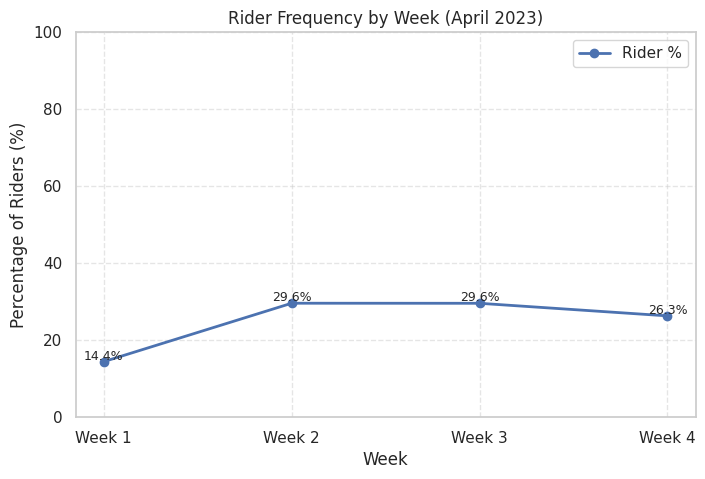

In [138]:
weekly_counts = (
    dfclean.groupby('week_bin')['payCardID']
    .nunique()
    .reset_index(name='riders')
)

total_riders = weekly_counts['riders'].sum()
weekly_counts['percentage'] = weekly_counts['riders'] / total_riders * 100

print(weekly_counts)

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(weekly_counts['week_bin'], weekly_counts['percentage'],
        marker='o', linewidth=2, label='Rider %')

for i, (week, pct) in enumerate(zip(weekly_counts['week_bin'], weekly_counts['percentage'])):
    ax.text(week, pct+0.5, f"{pct:.1f}%", ha='center', fontsize=9)

ax.set_title("Rider Frequency by Week (April 2023)")
ax.set_xlabel("Week")
ax.set_ylabel("Percentage of Riders (%)")
ax.set_ylim(0, 100)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.show()


**From the line chart above;**
* **week 1(14.4%)**, this likely represents the early weeks of Ramadan, when people reduce their travel and activities outside.
* **Week 2& Week 3(29.6%)**: the consistend and high percentage of riders during these weeks aligns with the Ramadan rush. When people are busy with preparations such as shopping for new clothes or started commuting to their home (as Libur Bersama started at 19th)
* **Week 4(26.3%)**: the slight drop in riders in the last week is likely due to the Eid al-Fitr holiday, where people already mudik.

**c. Revenue trend Week 1-4**

just to make sure the payAmount is numeric.

In [139]:
dfclean['payAmount'] = pd.to_numeric(dfclean['payAmount'], errors='coerce')
wk = dfclean.dropna(subset=['week_bin']).copy()

week_order = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
wk['week_bin'] = pd.Categorical(wk['week_bin'], categories=week_order, ordered=True)

Next, we do aggregration of total revenue and average revenue per trip

In [140]:
weekly_rev = (
    wk.groupby('week_bin', observed=True)['payAmount']
      .agg(total_revenue='sum', trips='count', avg_revenue_per_trip='mean')
      .reset_index()
      .sort_values('week_bin')
)

Then we also compute average daily revenue within each week. So we know the average daily revenue of it and make it as comparison week per week

In [141]:
wk['date'] = pd.to_datetime(wk['tapInTime'], errors='coerce').dt.date
daily_rev = wk.groupby(['week_bin','date'])['payAmount'].sum().reset_index()
avg_daily_rev = (daily_rev.groupby('week_bin')['payAmount']
                 .mean()
                 .rename('avg_daily_revenue')
                 .reset_index())

weekly_rev = weekly_rev.merge(avg_daily_rev, on='week_bin', how='left')

print("Revenue summary by week (April 2023):")
print(weekly_rev)

Revenue summary by week (April 2023):
  week_bin  total_revenue  trips  avg_revenue_per_trip  avg_daily_revenue
0   Week 1     22255500.0   8067           2758.832280           741850.0
1   Week 2     25999500.0   9577           2714.785423           866650.0
2   Week 3     29080500.0  10776           2698.635857           969350.0
3   Week 4     25789500.0   9480           2720.411392           859650.0


/tmp/ipython-input-1594309774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_rev = wk.groupby(['week_bin','date'])['payAmount'].sum().reset_index()
/tmp/ipython-input-1594309774.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_daily_rev = (daily_rev.groupby('week_bin')['payAmount']


Now we make it into percentage

In [142]:
weekly_rev['pct_change'] = weekly_rev['total_revenue'].pct_change() * 100

weekly_rev = weekly_rev.rename(columns={'pct_change': 'week_to_week_pct_change'})

print("Revenue trend with week-to-week changes:")
print(weekly_rev[['week_bin','total_revenue','week_to_week_pct_change']])


Revenue trend with week-to-week changes:
  week_bin  total_revenue  week_to_week_pct_change
0   Week 1     22255500.0                      NaN
1   Week 2     25999500.0                16.822808
2   Week 3     29080500.0                11.850228
3   Week 4     25789500.0               -11.316862


for make it easier to see the flows of the revenue, we convert it into line chart.

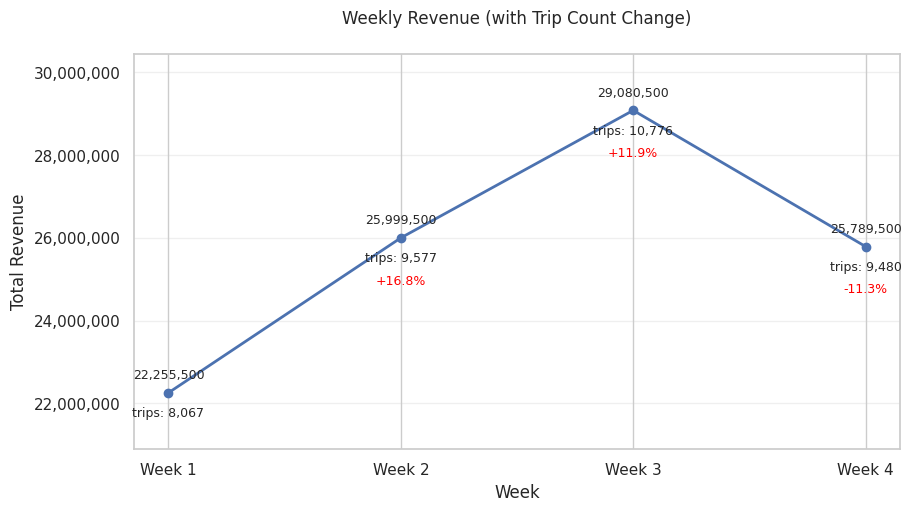

Week 1 → Week 2: +16.8%
Week 2 → Week 3: +11.9%
Week 3 → Week 4: -11.3%


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

order = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
df = weekly_rev.copy()
df['__order'] = pd.Categorical(df['week_bin'], categories=order, ordered=True)
df = df.sort_values('__order').drop(columns='__order')

x = df['week_bin'].astype(str).tolist()
y = df['total_revenue'].to_numpy(dtype=float)
n = df['trips'].to_numpy(dtype=int)

pct = np.insert((y[1:] - y[:-1]) / y[:-1] * 100, 0, np.nan)

fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)
ax.plot(x, y, marker='o', linewidth=2)
ax.set_title("Weekly Revenue (with Trip Count Change)", pad=22)
ax.set_xlabel("Week")
ax.set_ylabel("Total Revenue")
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.grid(True, axis='y', alpha=0.3)
plt.margins(x=0.05, y=0.20)

for i in range(len(x)):

    ax.annotate(f"{y[i]:,.0f}", (x[i], y[i]), xytext=(0, 8),
                textcoords="offset points", ha='center', va='bottom', fontsize=9)

    ax.annotate(f"trips: {n[i]:,}", (x[i], y[i]), xytext=(0, -10),
                textcoords="offset points", ha='center', va='top', fontsize=9)
    if i >= 1 and np.isfinite(pct[i]):
        ax.annotate(f"{pct[i]:+,.1f}%", (x[i], y[i]), xytext=(0, -26),
                    textcoords="offset points", ha='center', va='top', fontsize=9, color='red')

plt.show()

for i in range(1, len(x)):
    print(f"{x[i-1]} → {x[i]}: {pct[i]:+.1f}%")


**Summary**
* Even though the rider frequency in week 2 and week 3 are same (29.6%), the week 3 revenue is increasing by 11.9% from week 2. It can be route mix shift. same riders used routes with higer fares or longer distance in Week 3 (remembering the Cuti Bersama started at 19).


**Insights**
1. **mid-month momentum**: strong, sustained growth from W1 to W3 suggests effectuve mid-month drivers.
2. **concentration risk** nearly **28% of the month's revenue lands in week 3**. If that spike is tied to a specific event (payday, holiday timing, promo), month performance may be overly dependent on one window.

## **Section 5. Corridor & Financial Opportunity Sizing**

This section is to combine demand and revenue to rank corridorS by ROI, testing the correlation with buseist to most profitable one, and prioritize investments, targeted subsidies, and schedule changes with a defendable business case.

**a. Top 3 Most Profitable Corridors**

In [144]:
corridor_col = 'corridorName_filled' if 'corridorName_filled' in dfclean.columns else 'corridorName'

corridor_revenue = (
    dfclean.groupby(corridor_col)['payAmount']
           .sum()
           .reset_index()
           .sort_values(by='payAmount', ascending=False)
)

top3_profitable = corridor_revenue.head(3)

print("Top 3 most profitable corridors:")
print(top3_profitable)


Top 3 most profitable corridors:
                 corridorName  payAmount
21       Cibubur - Balai Kota  8203500.0
6     Bekasi Barat - Kuningan  4640000.0
31  Cinere - Bundaran Senayan  3723500.0


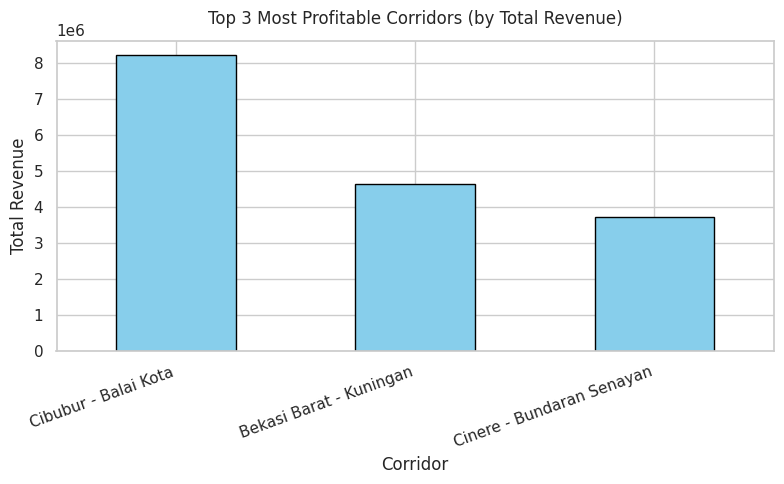

In [145]:
import matplotlib.pyplot as plt

ax = top3_profitable.plot(
    x=corridor_col,
    y='payAmount',
    kind='bar',
    figsize=(8,5),
    legend=False,
    color='skyblue',
    edgecolor='black'
)

ax.set_title("Top 3 Most Profitable Corridors (by Total Revenue)", pad=12)
ax.set_xlabel("Corridor")
ax.set_ylabel("Total Revenue")
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()


**b. Is there any correlation between busiest corridors and revenue of the corridor?**

We use Chi-Square test as both are categorical.

**Hypothesis**

Ho: busy corridors and high-revenue corridors are independence

H1: busy corridors and high-revenue corridors are dependence.

In [146]:
import pandas as pd
from scipy.stats import chi2_contingency


corridor_col = 'corridorName' if 'corridorName' in dfclean.columns else 'corridorName'


panel = (
    dfclean
    .groupby(corridor_col)
    .agg(trips=('corridorID', 'size'),
         revenue=('payAmount', 'sum'))
    .reset_index()
)



trips_q75 = panel['trips'].quantile(0.75)
rev_q75   = panel['revenue'].quantile(0.75)

panel['Busy']         = (panel['trips']    >= trips_q75).astype(int)
panel['HighRevenue']  = (panel['revenue']  >= rev_q75).astype(int)

ct = pd.crosstab(panel['Busy'], panel['HighRevenue'])  # 2x2 table
chi2, pval, dof, expected = chi2_contingency(ct)

print("Contingency table (Busy x HighRevenue):")
print(ct, "\n")
print(f"Chi-square = {chi2:.3f}, dof = {dof}, p-value = {pval:.4f}")

print(f"\nThresholds -> trips_q75={trips_q75:.0f}, revenue_q75={rev_q75:,.0f}")


Contingency table (Busy x HighRevenue):
HighRevenue    0   1
Busy                
0            141  21
1             21  34 

Chi-square = 49.244, dof = 1, p-value = 0.0000

Thresholds -> trips_q75=223, revenue_q75=654,500


**summary**
* Chi-Square = 49.244, dof = 1, which means **reject** H0.
* Busy status and high-revenue status are **strongly** associated.


**insights**
1. **high overlap**: most high-revenue corridor-weeks are also busy
2. **operational takeaway**: focus service reliability, capacity, and top-up infrastructure on busy+high-revenue corridors; audit busy+low-revenue corridors for leakage/discount; **protect** high-rev but not busy corridor (niche premium value)
3. For operations: consider **dynamic pricing or capacity reallocation** toward periods/corridors where busy already convers to revenue.

# **EXECUTIVE SUMMARY**

## **COMPANY OVERVIEW**

* **unique riders**: 2000
* **Gender** distributions composition is, female slighly higher (53.1%) while male is only 46.9%
* **Trip Duration**: 32.8% are taking the medium trip (61-90 minutes), while long trip (910120) following after that in 29.8% and short trip shortly with duration between 30-60 minutes after that (29.4%)
* **Age**: 40.8% are between 31-45, 28.6% in 18-30 years old and 14.2% are <18 years old.
* **Payment Share**: dominated by DKI (49.5%), eMoney (18.1%), Brizzi (9.3%) and others (Flazz, Online, BNI).
* **Total Trips:** 37,900
* **Revenue**: Rp103.125.000




## **1) Demand & Revenue Baseline**

**What we see**
* Stable female majority across the base (53.1%) and across most hours.
* Demand skews to 31–45 and 18–30 cohorts—prime commuters.
* Most rides last 61–90 minutes, aligning with cross-city commutes.
* DKI cards dominate payment (≈50%), suggesting strong dependency on a single issuer.

**Implications**
* The core business is commuter-led and female-leaning; peak reliability and safety perception are revenue-critical.
* Medium/long trip dominance implies corridors with longer spans and transfer reliability drive revenue per rider.

**Recommendations**
* **Baselined KPIs:** female retention, 18–45 cohort repeat rate, avg. fare per trip, medium/long trip on-time rate.
* **Payment levers:** explore co-promos with non-DKI issuers to reduce issuer concentration risk and nudge incremental trips.

## **2) Time of Day & Trip Patterns**

**Peaks & corridors**
* **Busiest dayparts: Morning 06:00–08:59 and Evening 17:00–19:59** across top corridors.
* **Top corridors (weekday & weekend):** 1T, S21, JIS3, 8C, JAK.06, 11P, 2E, 9D, M7B, 6N.
* **Weekend share:** generally <5% per corridor; JIS3 (6.2%) and S21 (6.1%) buck the trend—likely event-driven (e.g., Id Shalat in JIS as well as GBI cermont).
* Cibubur–Balai Kota: highest raw volume in both morning and evening peaks.
* **Kp. Rambutan–Pondok Gede:** most concentrated morning peak (~35.9% of daily trips in 06:00–08:59).
* **Midday (09:00–12:59):** 7–15% share; Ciputat–CSW stands out (~15.7%)—mixed business/leisure stops along the route.

**Heatmap interpretation**
* % Heatmap = within-corridor distribution (how a corridor’s demand spreads by hour).
* Raw Heatmap = absolute trips (total load to staff for).
* **A corridor can look “quiet” in % terms yet be a staffing hotspot in raw counts.**


**Recommendations**
* 1. Scale capacity on Cibubur–Balai Kota (both peaks): increase frequency and manage dwell times at transfer nodes.
* 2. Reliability push for Kp. Rambutan–Pondok Gede (AM peak): extra dispatchers, headway control, and quick-turn spares 06:00–09:00.
* 3. Event overlay for JIS3 / S21 (weekends): pre-announced express trips + temporary headway cuts aligned to event schedules.
* 4. Midday opportunity (Ciputat–CSW): trial clock-face headways and light marketing at leisure/business stops to lift off-peak.

## **3) Safety, Comfort & Accessibility**

**What we see**
* **Female riders dominate** most hour bins; early morning (00:00–05:59) is the exception (male-leaning).
* **Weekday vs weekend:** female share remains higher (weekday ~53%, weekend ~54.5%).
* **Age × Gender:**
  * <18: female 64.4%
  * 18–30: female 61.1%
  *31–45: female 53.8%
  *46–60: male ~70%
  *60: male ~87.8%

**Significance tests:**
* **Gender ↔ Hour bin:** **significant** association (different use windows by gender).
* **Gender ↔ Trip duration:** **no significant** association.
* **Gender ↔ Weekend/Weekday: no significant** association.
***Age ↔ Weekend/Weekday: no significant** association.

**Recommendations**
* **Early-morning safety pack:** brighter lighting, visible staff, and CCTV emphasis at key early-AM stops.
* **Female-focused peak messaging:** real-time crowding info + “first/last-mile tips” during 06:00–09:00 & 17:00–20:00.
* **Older male riders (>46):** signage and seating prioritization audits at interchanges used heavily by this cohort.

## **4) Retention & Rider Frequency**

**What we see**
* **Avg. active riders/day: 580** (reported activation ~68.2%).
* **Weekly rider frequency (W1→W4)**: 867 → 1,777 → 1,776 → 1,680 (stable mid-month plateau, slight W4 dip).
* **Revenue trend:**

  W1→W2: +16.8%

  W2→W3: +11.8%

  W3→W4: –11.0%

**note**:  W2→W3 revenue rose with similar rider counts—likely higher-fare corridors/longer trips (holiday week effects around the 19th).

**Recommendations**
* **Cohort tracking:** build weekly cohorts (first ride week) and monitor 4-week repeat rate by corridor and payment type.
* **Targeted win-backs:** riders active in W1–W2 but absent in W4 → off-peak fare nudges and “return to route” notifications.
* **Peak loyalty:** stamp-card or issuer co-promo for 3+ peak commutes/week on high-load corridors.

## **5) Corridor & Financial Opportunity Sizing**

**Profit lens (not just busy)**
* **Top 3 profitable corridors:**
  1. Cibubur–Balai Kota
  2. Bekasi Barat–Kuningan
  3. Cinere–Bundaran Senayan
* **Observation:** “Busy” often does coincide with “high-revenue,” but validate margin after operating costs (crew, dead-runs, layover constraints).

**Recommendations**
* **ROI board:** corridor-level (Revenue – Variable Ops Cost)/Bus-hour metric to rank adds/cuts.
* **Micro-express pilots:** limited-stop overlays on top earners during peaks to lift throughput without a full fleet increase.
* **Under-performers:** trim or retime bottom-10 corridor-hours; redeploy to top-10 opportunities.
* **Experiment → scale:** A/B test micro-express overlays, headway policies, and off-peak promos; scale winners system-wide.